<a href="https://colab.research.google.com/github/Lauriano-Viana/FIAP-fase-05/blob/main/LaurianoCostaViana_rm559475_pbl_fase4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Análise Exploratória dos Dados**

## 1️⃣ Importação de bibliotecas e carregamento dos dados

In [ ]:
# Importação de bibliotecas e carregamento dos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
from google.colab import files

In [ ]:
# Carregar os dados
df = pd.read_csv('/crop_yield.csv')

## 2️⃣ Exploração e pré-processamento dos dados
* Pré-processamento: Codificamos a variável categórica, normalizamos os dados e dividimos entre treino e teste.

In [ ]:
# Verificar valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())

Valores ausentes por coluna:
Crop                                    0
Precipitation (mm day-1)                0
Specific Humidity at 2 Meters (g/kg)    0
Relative Humidity at 2 Meters (%)       0
Temperature at 2 Meters (C)             0
Yield                                   0
dtype: int64


In [ ]:
# Estatísticas descritivas
print("\nResumo estatístico:")
print(df.describe())


Resumo estatístico:
       Precipitation (mm day-1)  Specific Humidity at 2 Meters (g/kg)  Relative Humidity at 2 Meters (%)  Temperature at 2 Meters (C)          Yield
count                156.000000                            156.000000                         156.000000                    156.00000     156.000000
mean                2486.498974                             18.203077                          84.737692                     26.18359   56153.096154
std                  289.457914                              0.293923                           0.996226                      0.26105   70421.958897
min                 1934.620000                             17.540000                          82.110000                     25.56000    5249.000000
25%                 2302.990000                             18.030000                          84.120000                     26.02000    8327.750000
50%                 2424.550000                             18.270000                

In [ ]:
# Codificar a variável categórica 'Crop'
label_encoder = LabelEncoder()
df["Crop"] = label_encoder.fit_transform(df["Crop"])

In [ ]:
# Separar variáveis preditoras e alvo
X = df.drop(columns=["Yield"])
y = df["Yield"]

In [ ]:
# Normalizar as variáveis preditoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Confirmar dimensões
X_train.shape, X_test.shape

((124, 5), (32, 5))

3️⃣ Treinamento e avaliação dos modelos
* Modelagem: Treinamos cinco modelos diferentes.

In [ ]:
# Dicionário para armazenar os modelos e resultados
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
}

In [ ]:
# Treinar e avaliar os modelos
results = {}

for name, model in models.items():
    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões
    y_pred = model.predict(X_test)

    # Avaliação
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Armazenar os resultados
    results[name] = {"R²": r2, "RMSE": rmse}

In [ ]:
# Exibir os resultados
results_df = pd.DataFrame(results).T
print(results_df)

                         R²          RMSE
Linear Regression -0.101459  65364.569016
Random Forest      0.994401   4660.468759
Gradient Boosting  0.993093   5176.012625
KNN                0.641919  37269.088117
MLP Regressor     -0.531651  77079.376584


4️⃣ Visualização da Performance
* Avaliação: Usamos R² (coeficiente de determinação) e RMSE (erro médio quadrático raiz).
* Geramos gráficos comparando a performance dos modelos.

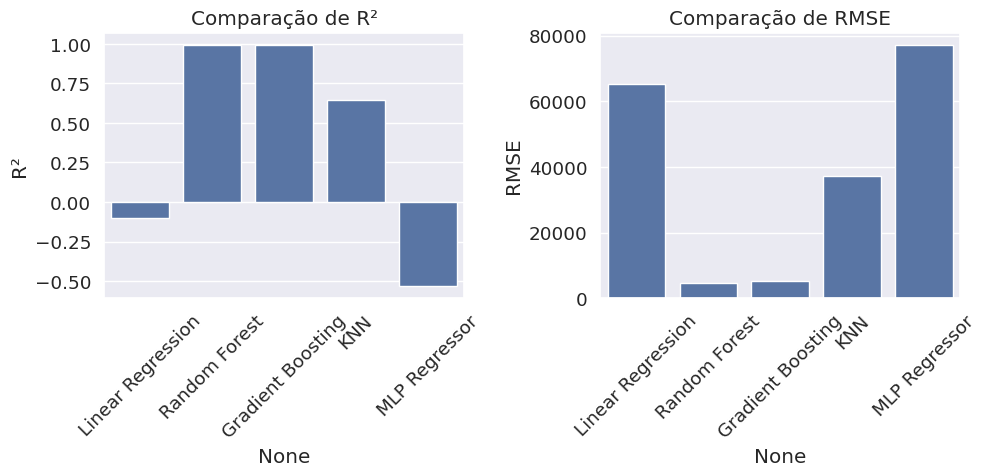

In [ ]:
# Gráfico de comparação entre os modelos
plt.figure(figsize=(10,5))

# Gráfico de R²
plt.subplot(1, 2, 1)
sns.barplot(x=results_df.index, y=results_df["R²"])
plt.xticks(rotation=45)
plt.title("Comparação de R²")

# Gráfico de RMSE
plt.subplot(1, 2, 2)
sns.barplot(x=results_df.index, y=results_df["RMSE"])
plt.xticks(rotation=45)
plt.title("Comparação de RMSE")

plt.tight_layout()
plt.show()

## Conclusão:
### Com base nos resultados fornecidos, o Random Forest é o modelo com o melhor desempenho. Isso pode ser observado pelos seguintes motivos:

    Coeficiente de Determinação (R²):

        O Random Forest tem um valor de R² de 0,994401, que é o mais próximo de 1 entre todos os modelos. Isso indica que ele explica aproximadamente 99,44% da variância dos dados, mostrando um excelente ajuste.

    Erro (presumivelmente RMSE ou MAE):

        O Random Forest também tem o menor erro (4660,468759), o que significa que suas previsões são as mais precisas em comparação com os outros modelos.

Em resumo, o Random Forest é o modelo com melhor desempenho, tanto em termos de capacidade explicativa (R²) quanto de precisão (erro reduzido).

# 2. Análise de Tendências, Clusters e Outliers


## 1. Identificação de Outliers

Métodos múltiplos para detecção de outliers:

* Método Z-score (identificação estatística)
* Método IQR (baseado no intervalo interquartil)
* Isolation Forest (detecção de outliers multivariados)


Visualização espacial de outliers usando redução de dimensionalidade PCA

Análise detalhada dos outliers identificados para entender condições extremas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Configurações para visualização
#plt.style.use('seaborn-whitegrid')
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.2)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df = pd.read_csv('/crop_yield.csv')

In [ ]:
print("Primeiras linhas dos dados:")
display(df.head())

# Obter lista de culturas
crops = df['Crop'].unique()
print(f"\nCulturas no dataset: {', '.join(crops)}")

Primeiras linhas dos dados:


Crop  Precipitation (mm day-1)  Specific Humidity at 2 Meters (g/kg)  Relative Humidity at 2 Meters (%)  Temperature at 2 Meters (C)  Yield
0  Cocoa, beans                   2248.92                                 17.72                              83.40                        26.01  11560
1  Cocoa, beans                   1938.42                                 17.54                              82.11                        26.11  11253
2  Cocoa, beans                   2301.54                                 17.81                              82.79                        26.24   9456
3  Cocoa, beans                   2592.35                                 17.61                              85.07                        25.56   9321
4  Cocoa, beans                   2344.72                                 17.61                              84.12                        25.76   8800


Culturas no dataset: Cocoa, beans, Oil palm fruit, Rice, paddy, Rubber, natural




==== ANÁLISE DE OUTLIERS POR CULTURA ====

Cultura: Cocoa, beans
Total de observações: 39
Outliers pelo método Z-Score (z > 2.5): 0 (0.0%)
Outliers pelo método IQR: 0 (0.0%)

Cultura: Oil palm fruit
Total de observações: 39
Outliers pelo método Z-Score (z > 2.5): 0 (0.0%)
Outliers pelo método IQR: 0 (0.0%)

Cultura: Rice, paddy
Total de observações: 39
Outliers pelo método Z-Score (z > 2.5): 0 (0.0%)
Outliers pelo método IQR: 0 (0.0%)

Cultura: Rubber, natural
Total de observações: 39
Outliers pelo método Z-Score (z > 2.5): 0 (0.0%)
Outliers pelo método IQR: 0 (0.0%)


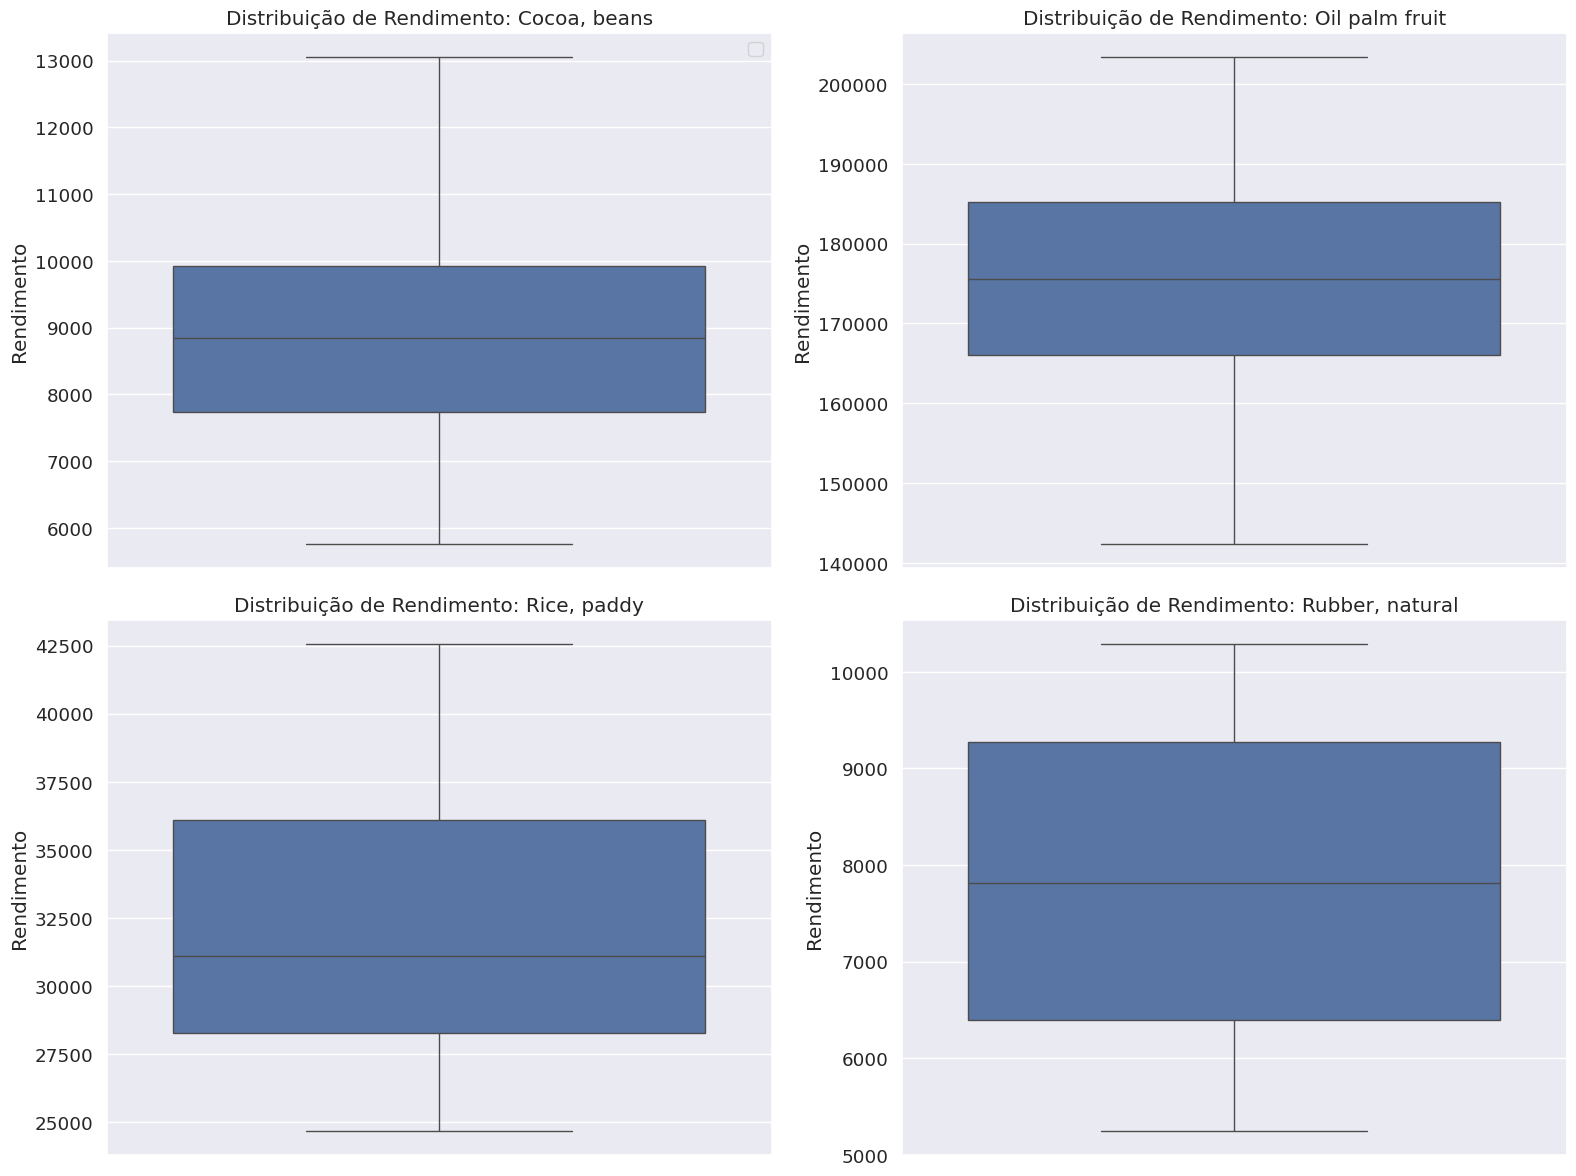

In [ ]:
# =====================================================
# 1. IDENTIFICAÇÃO DE OUTLIERS POR CULTURA
# =====================================================
print("\n\n==== ANÁLISE DE OUTLIERS POR CULTURA ====")

plt.figure(figsize=(16, 12))
for i, crop in enumerate(crops):
    crop_data = df[df['Crop'] == crop]

    # Subplot para cada cultura
    ax = plt.subplot(2, 2, i+1)

    # Boxplot para identificação visual de outliers
    sns.boxplot(y='Yield', data=crop_data, ax=ax)

    # Método Z-score para identificar outliers
    z_scores = stats.zscore(crop_data['Yield'])
    outliers_z = crop_data[abs(z_scores) > 2.5]

    # Método IQR para identificar outliers
    Q1 = crop_data['Yield'].quantile(0.25)
    Q3 = crop_data['Yield'].quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr = crop_data[(crop_data['Yield'] < (Q1 - 1.5 * IQR)) | (crop_data['Yield'] > (Q3 + 1.5 * IQR))]

    # Adicionar pontos de outliers ao gráfico
    if not outliers_z.empty:
        ax.scatter(np.zeros(len(outliers_z)), outliers_z['Yield'], color='red', s=100, marker='x', label='Z-Score Outliers')
    # Estatísticas sobre outliers
    print(f"\nCultura: {crop}")
    print(f"Total de observações: {len(crop_data)}")
    print(f"Outliers pelo método Z-Score (z > 2.5): {len(outliers_z)} ({len(outliers_z)/len(crop_data)*100:.1f}%)")
    print(f"Outliers pelo método IQR: {len(outliers_iqr)} ({len(outliers_iqr)/len(crop_data)*100:.1f}%)")

    if not outliers_z.empty:
        print("Detalhes dos outliers (Z-Score):")
        for idx, row in outliers_z.iterrows():
            print(f"  Yield: {row['Yield']}, Precipitação: {row['Precipitation (mm day-1)']}, Temperatura: {row['Temperature at 2 Meters (C)']}")

    plt.title(f'Distribuição de Rendimento: {crop}')
    plt.ylabel('Rendimento')
    if i == 0:
        plt.legend()

plt.tight_layout()
plt.show()




==== DETECÇÃO DE OUTLIERS MULTIVARIADOS COM ISOLATION FOREST ====

Cultura: Cocoa, beans
Outliers multivariados detectados: 4 (10.3%)
Detalhes dos principais outliers multivariados:


Yield  Precipitation (mm day-1)  Temperature at 2 Meters (C)  Relative Humidity at 2 Meters (%)
27  13056                   3085.79                        26.03                              86.10
35  11487                   2410.13                        26.81                              83.45
1   11253                   1938.42                        26.11                              82.11
3    9321                   2592.35                        25.56                              85.07

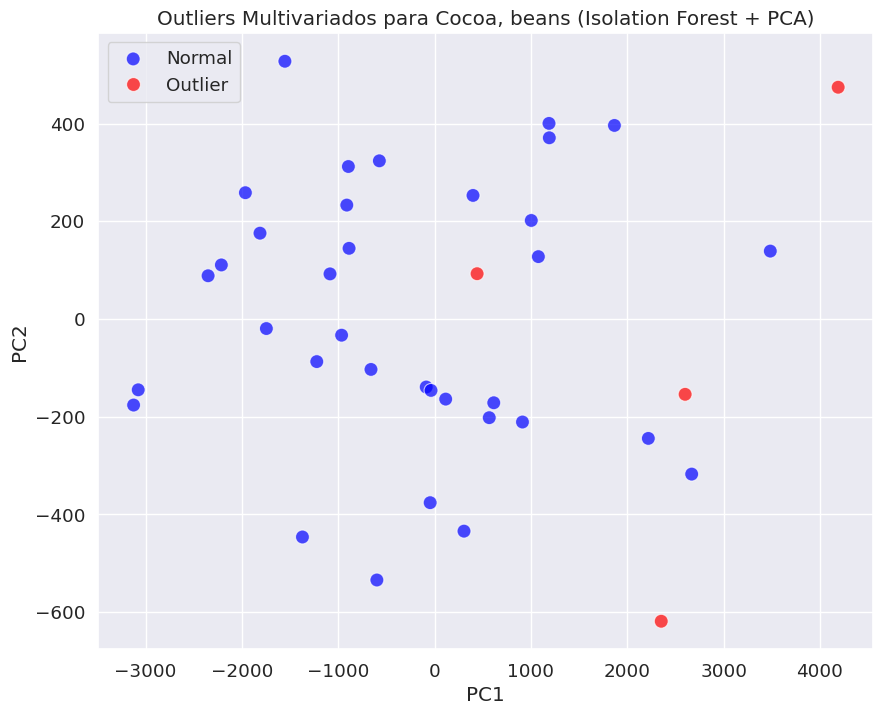


Cultura: Oil palm fruit
Outliers multivariados detectados: 4 (10.3%)
Detalhes dos principais outliers multivariados:


Yield  Precipitation (mm day-1)  Temperature at 2 Meters (C)  Relative Humidity at 2 Meters (%)
40  201436                   1938.42                        26.11                              82.11
75  199074                   2967.41                        26.46                              85.48
42  181826                   2592.35                        25.56                              85.07
56  142425                   2362.80                        26.79                              84.03

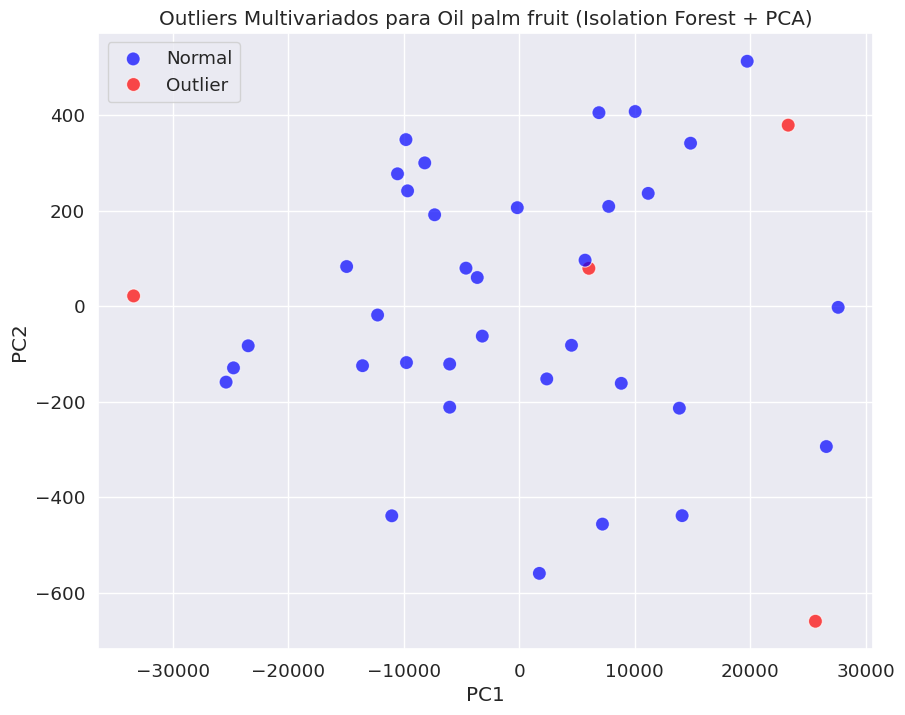


Cultura: Rice, paddy
Outliers multivariados detectados: 4 (10.3%)
Detalhes dos principais outliers multivariados:


Yield  Precipitation (mm day-1)  Temperature at 2 Meters (C)  Relative Humidity at 2 Meters (%)
116  42550                   2109.34                        26.72                              83.52
113  39775                   2410.13                        26.81                              83.45
79   27619                   1938.42                        26.11                              82.11
81   25187                   2592.35                        25.56                              85.07

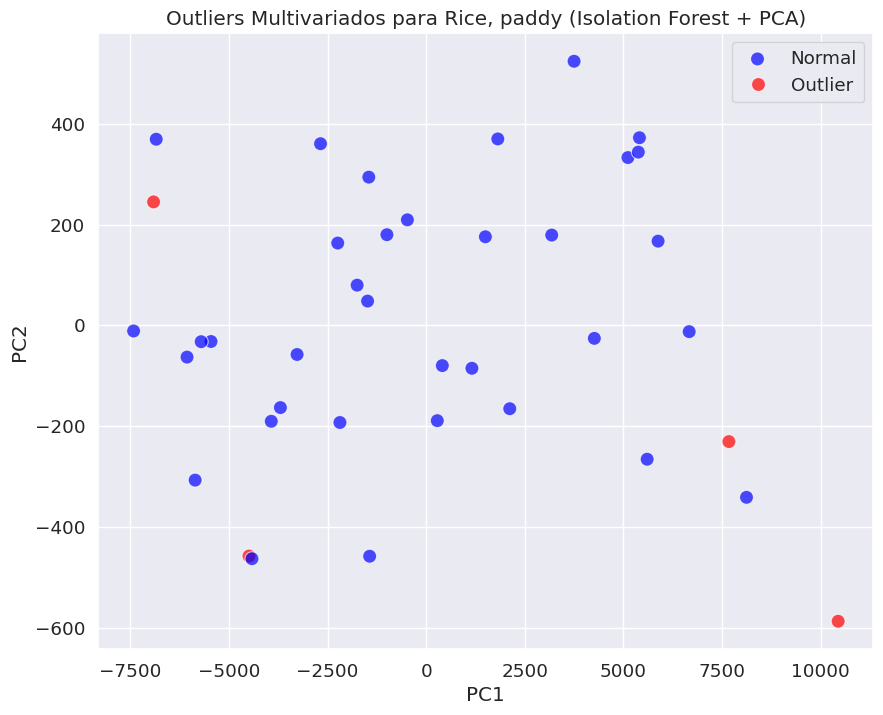


Cultura: Rubber, natural
Outliers multivariados detectados: 4 (10.3%)
Detalhes dos principais outliers multivariados:


Yield  Precipitation (mm day-1)  Temperature at 2 Meters (C)  Relative Humidity at 2 Meters (%)
120   9718                   2592.35                        25.56                              85.07
118   9223                   1938.42                        26.11                              82.11
155   5903                   2109.34                        26.72                              83.52
134   5693                   2362.80                        26.79                              84.03

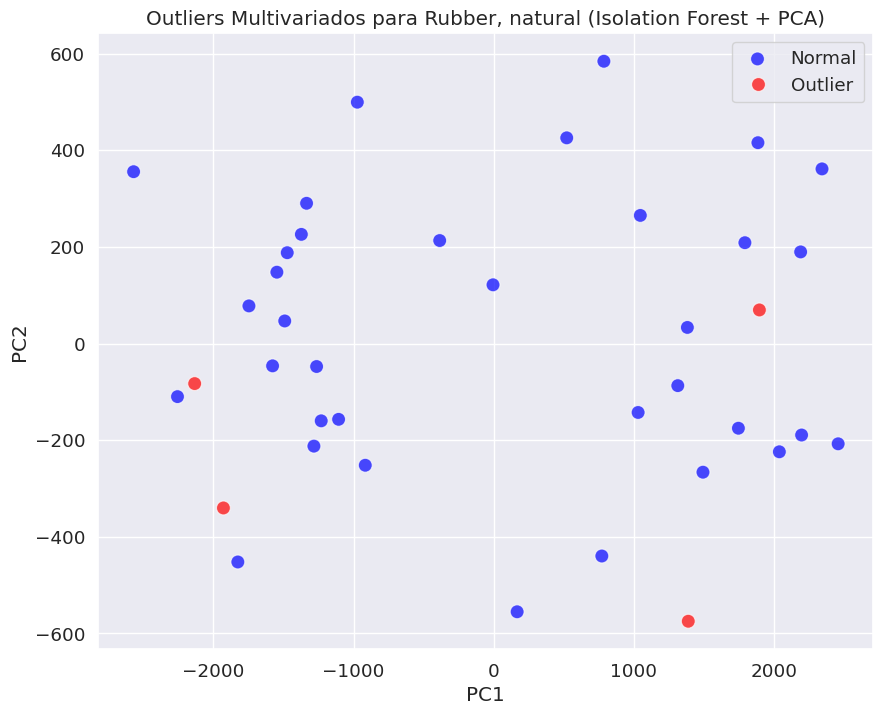

In [ ]:
# Isolation Forest para detecção de outliers multivariados
print("\n\n==== DETECÇÃO DE OUTLIERS MULTIVARIADOS COM ISOLATION FOREST ====")

for crop in crops:
    crop_data = df[df['Crop'] == crop]

    # Selecionar colunas numéricas para análise
    features = ['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)',
               'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']
    X = crop_data[features]

    # Aplicar Isolation Forest
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    outliers = iso_forest.fit_predict(X)

    # -1 representa outliers
    outlier_indices = np.where(outliers == -1)[0]

    print(f"\nCultura: {crop}")
    print(f"Outliers multivariados detectados: {len(outlier_indices)} ({len(outlier_indices)/len(crop_data)*100:.1f}%)")

    if len(outlier_indices) > 0:
        print("Detalhes dos principais outliers multivariados:")
        outlier_data = crop_data.iloc[outlier_indices].sort_values(by='Yield', ascending=False)
        display(outlier_data[['Yield', 'Precipitation (mm day-1)', 'Temperature at 2 Meters (C)', 'Relative Humidity at 2 Meters (%)']])

        # Visualizar outliers em 2D após redução de dimensionalidade
        plt.figure(figsize=(10, 8))

        # Aplicar PCA para visualização em 2D
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)

        # Criar dataframe com resultados do PCA
        pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
        pca_df['outlier'] = outliers

        # Plotar resultados
        sns.scatterplot(x='PC1', y='PC2', hue='outlier', data=pca_df, palette={-1: 'red', 1: 'blue'},
                        alpha=0.7, s=100, legend='full')
        plt.title(f'Outliers Multivariados para {crop} (Isolation Forest + PCA)')
        plt.legend(['Normal', 'Outlier'])
        plt.show()


## 2. Análise de Clusterização

* Agrupamento de cenários similares usando K-means
* Determinação do número ideal de clusters com o método do cotovelo
* Caracterização de cada cluster com base em condições climáticas e rendimentos
* Visualização bidimensional dos clusters via PCA para entender padrões
* Análise comparativa entre clusters para identificar condições favoráveis



==== ANÁLISE DE CLUSTERS POR CULTURA ====

--- Análise de Clusters para Cocoa, beans ---


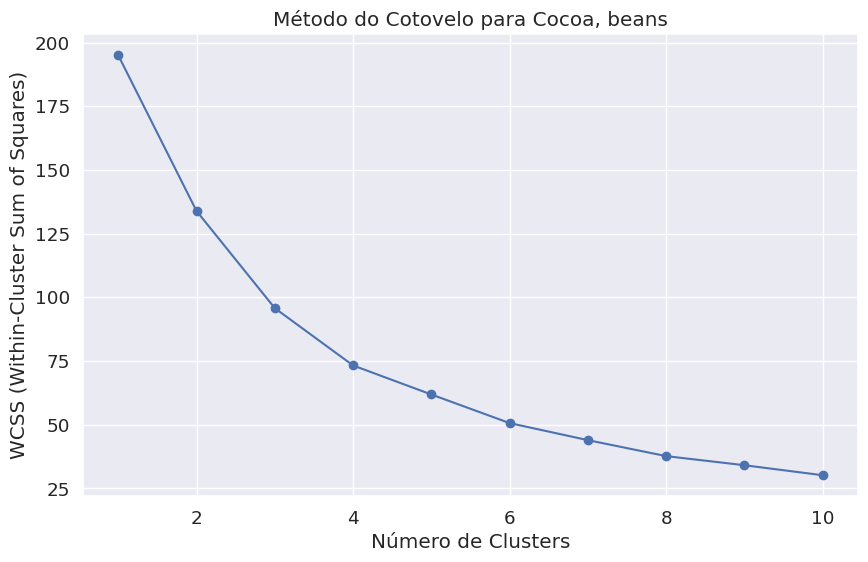


--- Análise de Clusters para Oil palm fruit ---


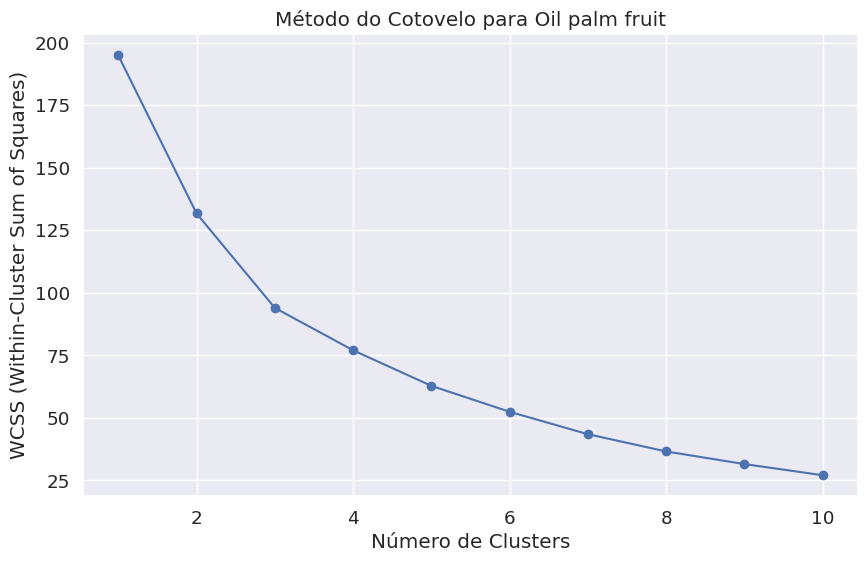


--- Análise de Clusters para Rice, paddy ---


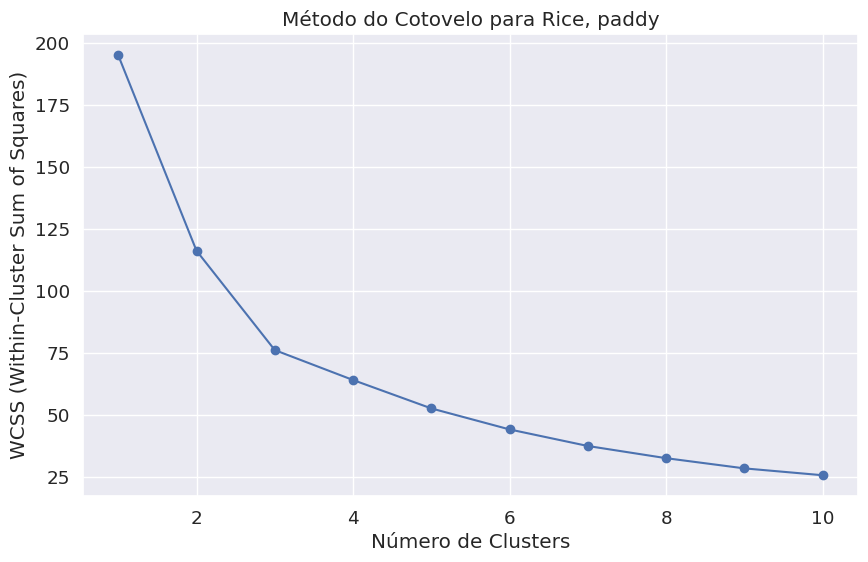


--- Análise de Clusters para Rubber, natural ---


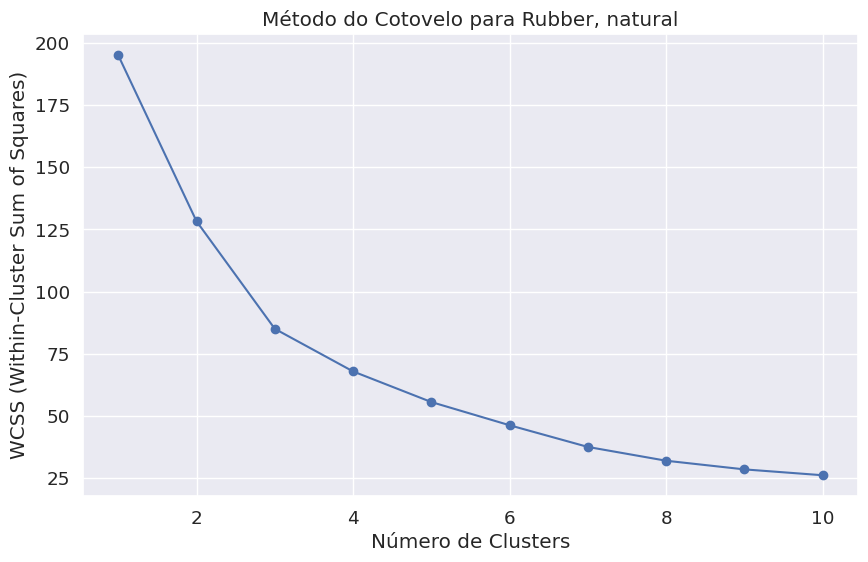

In [ ]:
# =====================================================
# 2. ANÁLISE DE CLUSTERS PARA IDENTIFICAR PADRÕES
# =====================================================
print("\n\n==== ANÁLISE DE CLUSTERS POR CULTURA ====")

# Análise de clusters separada para cada cultura
for crop in crops:
    print(f"\n--- Análise de Clusters para {crop} ---")
    crop_data = df[df['Crop'] == crop]

    # Selecionar características para clustering
    features = ['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)',
               'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']
    X = crop_data[features]

    # Padronizar os dados
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=features)

    # Determinar número ideal de clusters usando o método do cotovelo
    wcss = []
    max_clusters = min(10, len(crop_data) - 1)  # Não mais clusters que dados
    K_range = range(1, max_clusters + 1)

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)

    # Plotar método do cotovelo
    plt.figure(figsize=(10, 6))
    plt.plot(K_range, wcss, '-o')
    plt.title(f'Método do Cotovelo para {crop}')
    plt.xlabel('Número de Clusters')
    plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
    plt.grid(True)
    plt.show()



Estatísticas dos 6 clusters identificados:

Cluster 0 (n=10):
  Rendimento médio: 7051.00
  Precipitação média: 2353.38 mm/dia
  Temperatura média: 26.32°C
  Umidade Relativa média: 84.32%

Cluster 1 (n=10):
  Rendimento médio: 8869.90
  Precipitação média: 2814.27 mm/dia
  Temperatura média: 26.19°C
  Umidade Relativa média: 85.57%

Cluster 2 (n=3):
  Rendimento médio: 5948.00
  Precipitação média: 2294.09 mm/dia
  Temperatura média: 26.77°C
  Umidade Relativa média: 83.67%

Cluster 3 (n=4):
  Rendimento médio: 9103.25
  Precipitação média: 2105.88 mm/dia
  Temperatura média: 26.14°C
  Umidade Relativa média: 82.93%

Cluster 4 (n=5):
  Rendimento médio: 9640.80
  Precipitação média: 2332.81 mm/dia
  Temperatura média: 25.81°C
  Umidade Relativa média: 84.54%

Cluster 5 (n=7):
  Rendimento médio: 6214.43
  Precipitação média: 2618.16 mm/dia
  Temperatura média: 26.02°C
  Umidade Relativa média: 85.76%


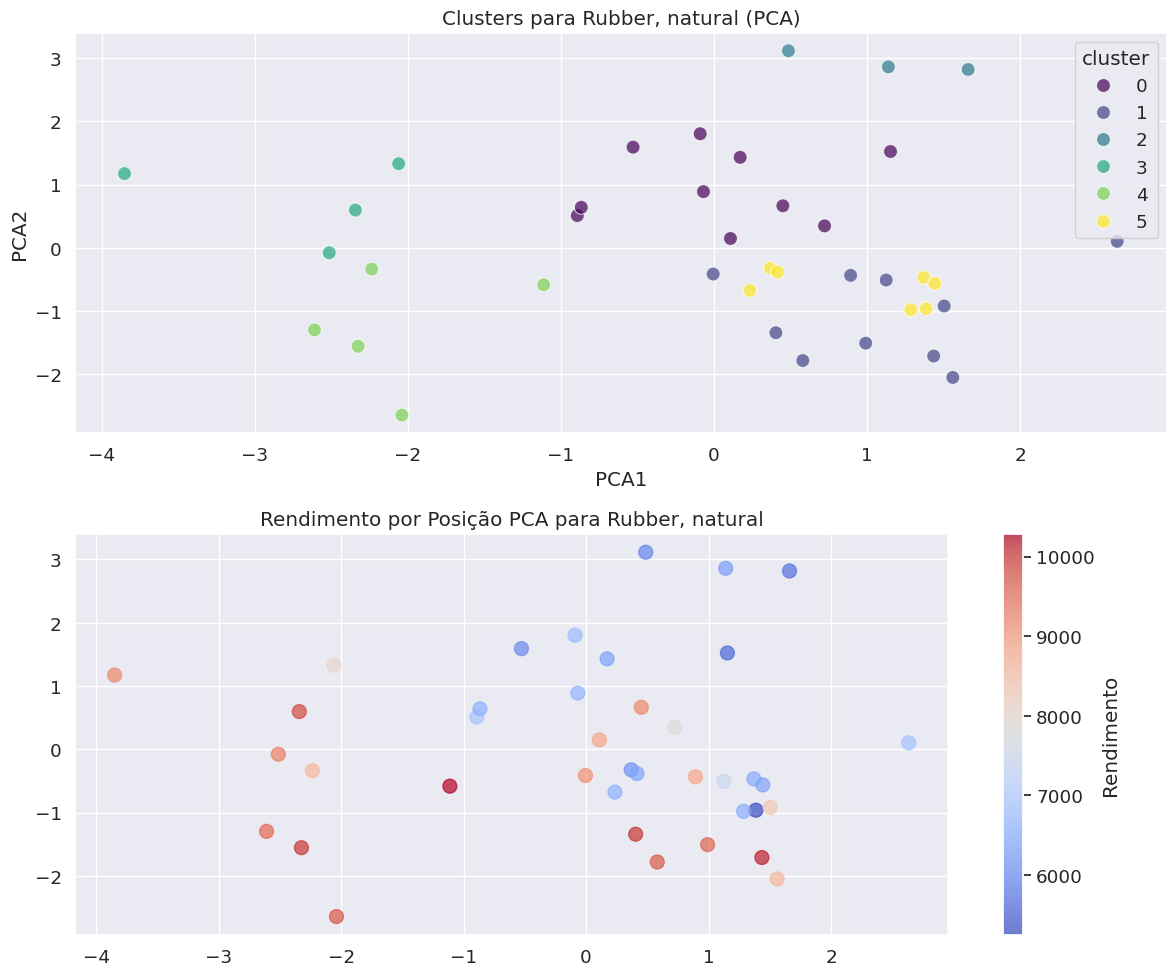

In [ ]:
    # Escolher número ótimo de clusters (analisando o gráfico)
    # Aqui usamos uma heurística simples, mas recomenda-se analisar visualmente o gráfico
    n_clusters = 6  # Valor padrão, ajuste conforme necessário após ver o gráfico

    # Aplicar K-means com o número ótimo de clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    crop_data['cluster'] = kmeans.fit_predict(X_scaled)

    # Estatísticas dos clusters
    print(f"\nEstatísticas dos {n_clusters} clusters identificados:")
    for cluster in range(n_clusters):
        cluster_data = crop_data[crop_data['cluster'] == cluster]
        print(f"\nCluster {cluster} (n={len(cluster_data)}):")
        print(f"  Rendimento médio: {cluster_data['Yield'].mean():.2f}")
        print(f"  Precipitação média: {cluster_data['Precipitation (mm day-1)'].mean():.2f} mm/dia")
        print(f"  Temperatura média: {cluster_data['Temperature at 2 Meters (C)'].mean():.2f}°C")
        print(f"  Umidade Relativa média: {cluster_data['Relative Humidity at 2 Meters (%)'].mean():.2f}%")

    # Visualização dos clusters em 2D usando PCA
    plt.figure(figsize=(12, 10))

    # Aplicar PCA para redução de dimensionalidade
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Adicionar componentes PCA ao DataFrame
    crop_data['PCA1'] = X_pca[:, 0]
    crop_data['PCA2'] = X_pca[:, 1]

    # Plotar clusters
    plt.subplot(2, 1, 1)
    sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=crop_data, palette='viridis', s=100, alpha=0.7)
    plt.title(f'Clusters para {crop} (PCA)')

    # Plotar rendimento nos mesmos pontos PCA
    plt.subplot(2, 1, 2)
    scatter = plt.scatter(crop_data['PCA1'], crop_data['PCA2'], c=crop_data['Yield'],
                cmap='coolwarm', s=100, alpha=0.7)
    plt.colorbar(scatter, label='Rendimento')
    plt.title(f'Rendimento por Posição PCA para {crop}')

    plt.tight_layout()
    plt.show()

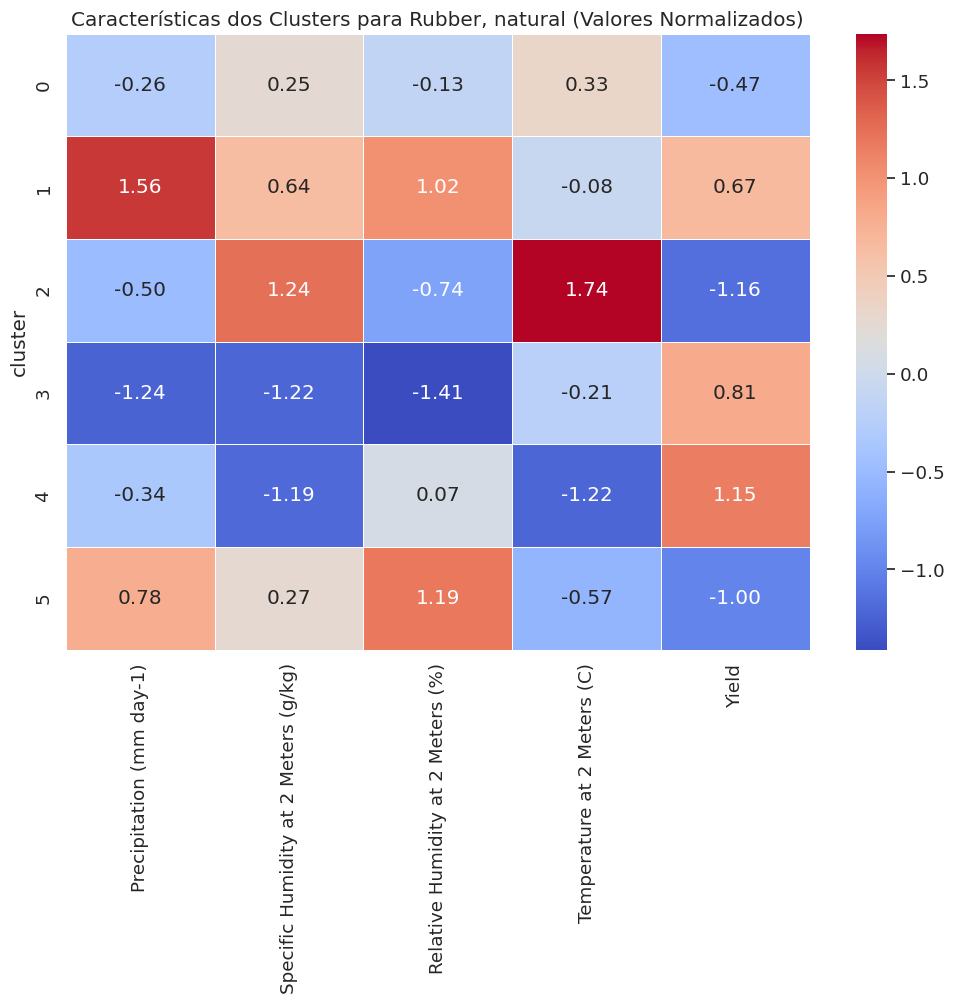

In [ ]:
  # Comparando características dos clusters em um heatmap
  plt.figure(figsize=(12, 8))

  # Calcular médias de cada característica por cluster
  cluster_means = crop_data.groupby('cluster')[features].mean()

  # Normalizar para facilitar a comparação
  cluster_means_normalized = (cluster_means - cluster_means.mean()) / cluster_means.std()

  # Plotar heatmap
  sns.heatmap(cluster_means_normalized, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
  plt.title(f'Características dos Clusters para {crop} (Valores Normalizados)')
  plt.show()


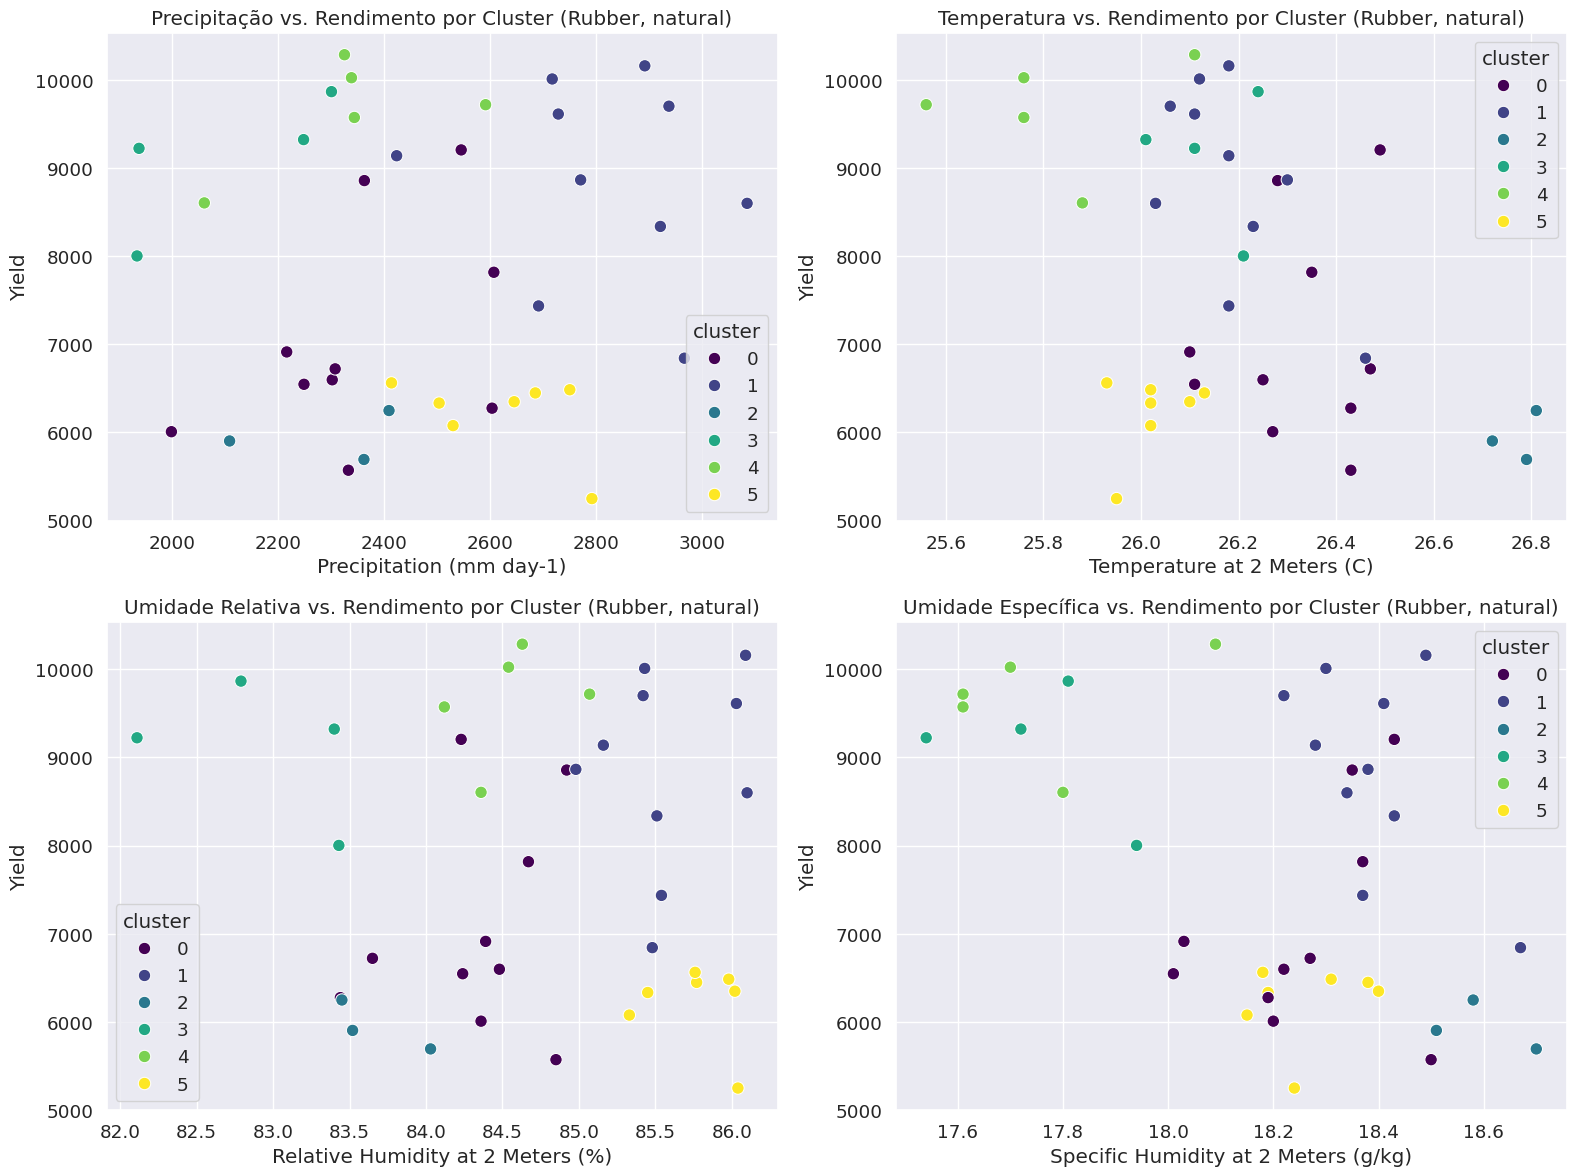

In [ ]:
    # Análise de pares de características por cluster
    plt.figure(figsize=(16, 12))

    # Característica vs. Rendimento para cada cluster
    plt.subplot(2, 2, 1)
    sns.scatterplot(x='Precipitation (mm day-1)', y='Yield', hue='cluster', data=crop_data, palette='viridis', s=80)
    plt.title(f'Precipitação vs. Rendimento por Cluster ({crop})')

    plt.subplot(2, 2, 2)
    sns.scatterplot(x='Temperature at 2 Meters (C)', y='Yield', hue='cluster', data=crop_data, palette='viridis', s=80)
    plt.title(f'Temperatura vs. Rendimento por Cluster ({crop})')

    plt.subplot(2, 2, 3)
    sns.scatterplot(x='Relative Humidity at 2 Meters (%)', y='Yield', hue='cluster', data=crop_data, palette='viridis', s=80)
    plt.title(f'Umidade Relativa vs. Rendimento por Cluster ({crop})')

    plt.subplot(2, 2, 4)
    sns.scatterplot(x='Specific Humidity at 2 Meters (g/kg)', y='Yield', hue='cluster', data=crop_data, palette='viridis', s=80)
    plt.title(f'Umidade Específica vs. Rendimento por Cluster ({crop})')

    plt.tight_layout()
    plt.show()

## 3. Análise de Tendências Temporais

* Identificação de tendências de rendimento ao longo do tempo para cada cultura
* Quantificação das tendências usando regressão linear
* Análise de mudanças nas variáveis climáticas ao longo do tempo
* Correlação entre mudanças climáticas e rendimentos



==== ANÁLISE DE TENDÊNCIAS TEMPORAIS ====


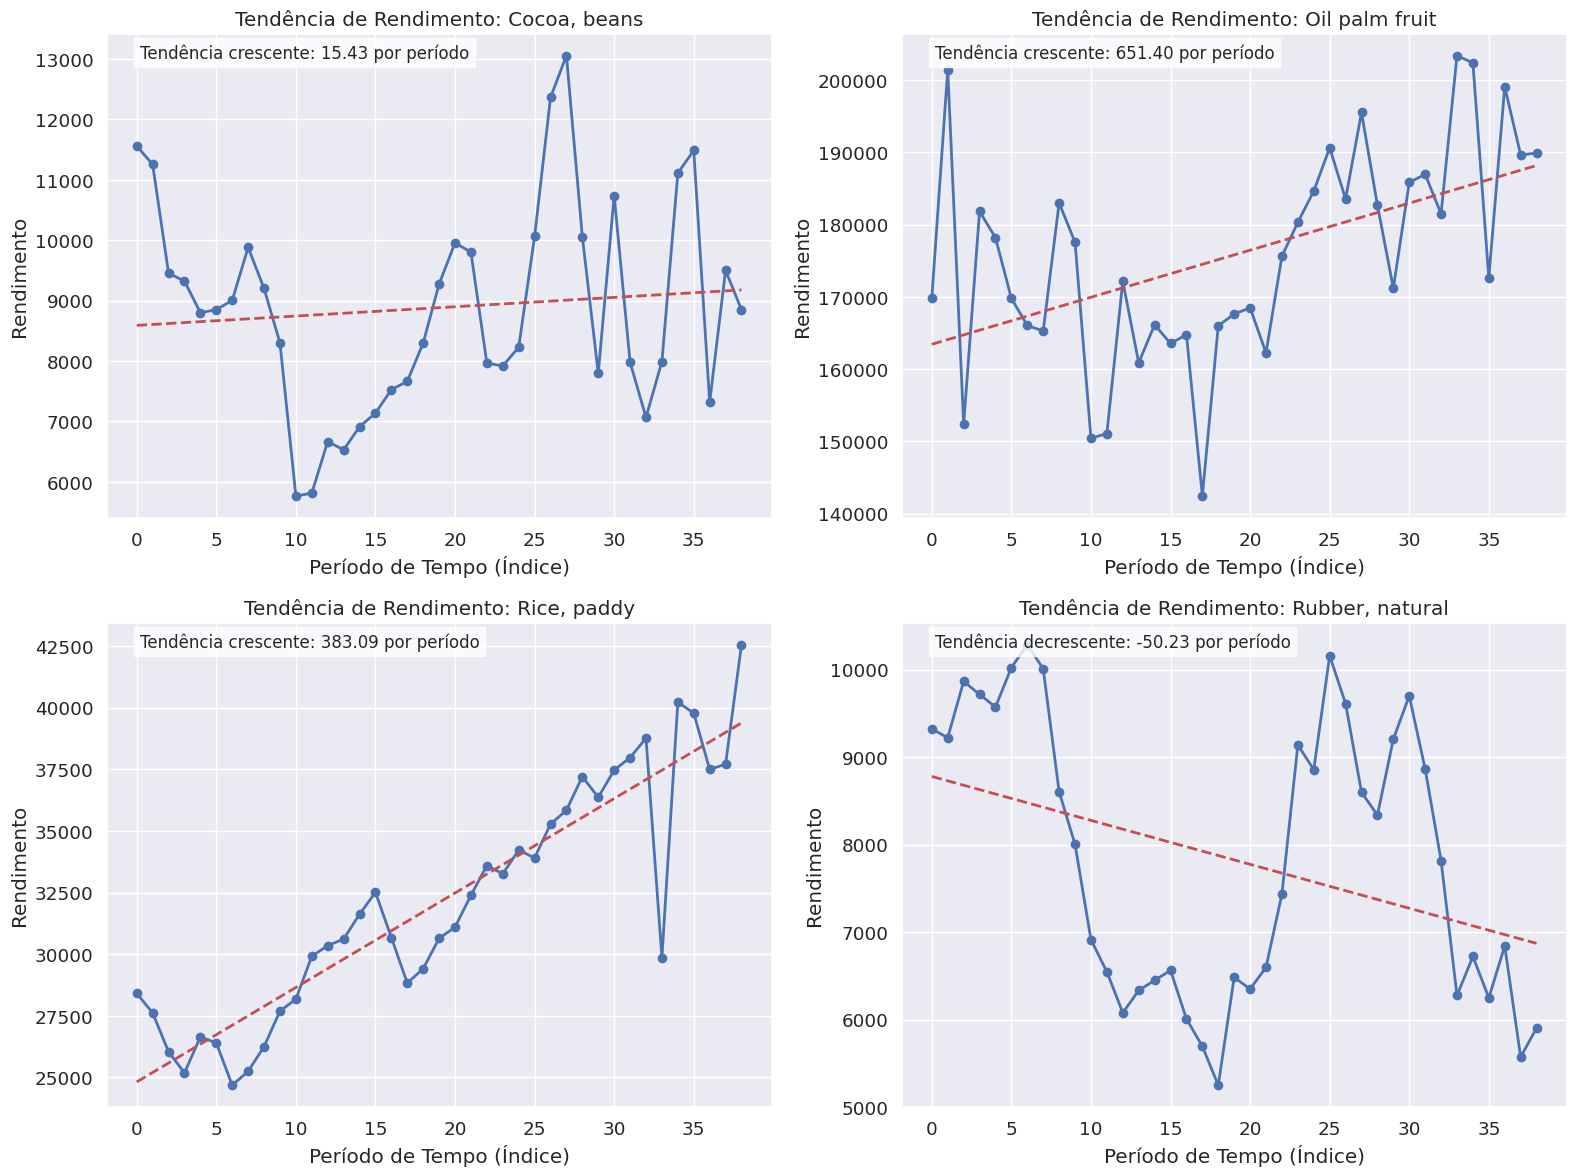

In [ ]:
# =====================================================
# 3. ANÁLISE DE TENDÊNCIAS TEMPORAIS
# =====================================================
print("\n\n==== ANÁLISE DE TENDÊNCIAS TEMPORAIS ====")

# Assumindo que os dados estão ordenados cronologicamente dentro de cada cultura
# Adicionamos um índice de tempo para análise de tendências
for crop in crops:
    crop_indices = df[df['Crop'] == crop].index
    df.loc[crop_indices, 'time_index'] = range(len(crop_indices))

# Visualização de tendências de rendimento por cultura
plt.figure(figsize=(16, 12))
for i, crop in enumerate(crops):
    crop_data = df[df['Crop'] == crop]

    plt.subplot(2, 2, i+1)

    # Gráfico de linha para rendimento ao longo do tempo
    plt.plot(crop_data['time_index'], crop_data['Yield'], marker='o', linestyle='-', linewidth=2)

    # Adicionar linha de tendência (regressão linear)
    z = np.polyfit(crop_data['time_index'], crop_data['Yield'], 1)
    p = np.poly1d(z)
    plt.plot(crop_data['time_index'], p(crop_data['time_index']), "r--", linewidth=2)

    # Calcular e mostrar a inclinação da tendência
    slope = z[0]
    trend_direction = "crescente" if slope > 0 else "decrescente"
    plt.text(0.05, 0.95, f"Tendência {trend_direction}: {slope:.2f} por período",
             transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

    plt.title(f'Tendência de Rendimento: {crop}')
    plt.xlabel('Período de Tempo (Índice)')
    plt.ylabel('Rendimento')
    plt.grid(True)

plt.tight_layout()
plt.show()

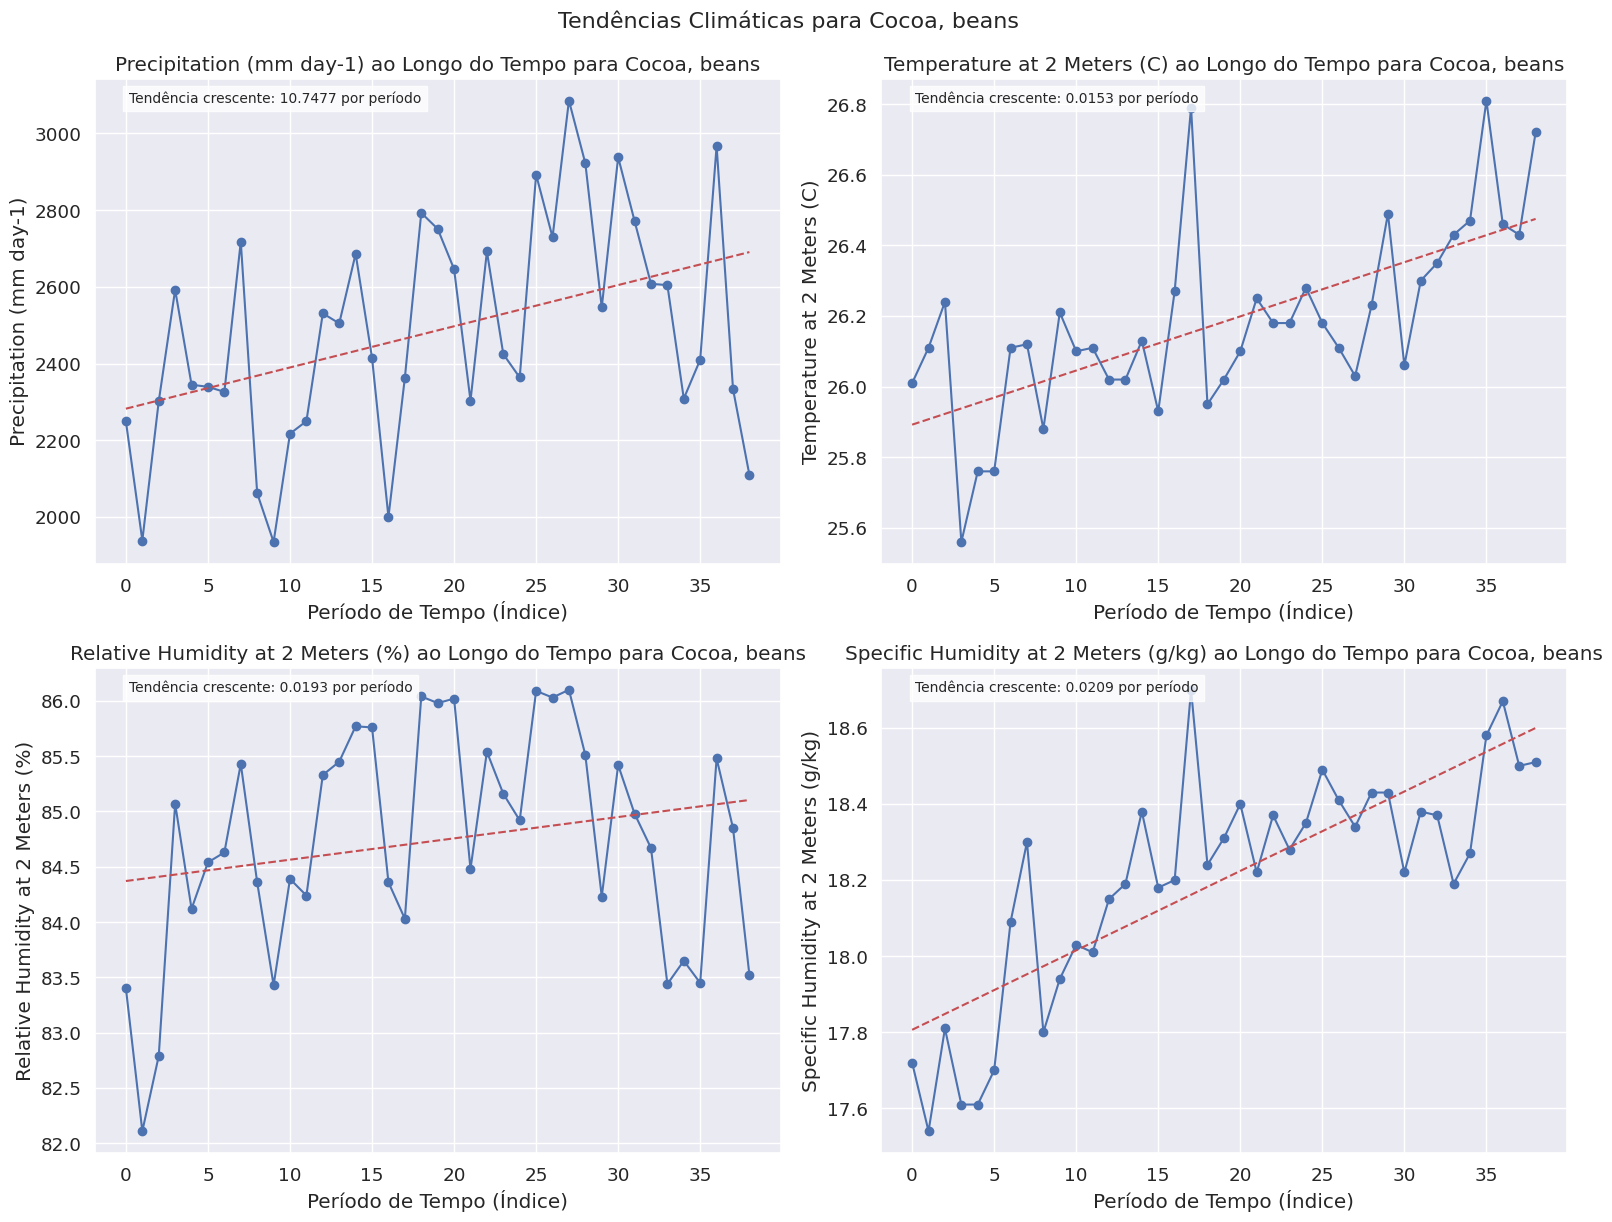

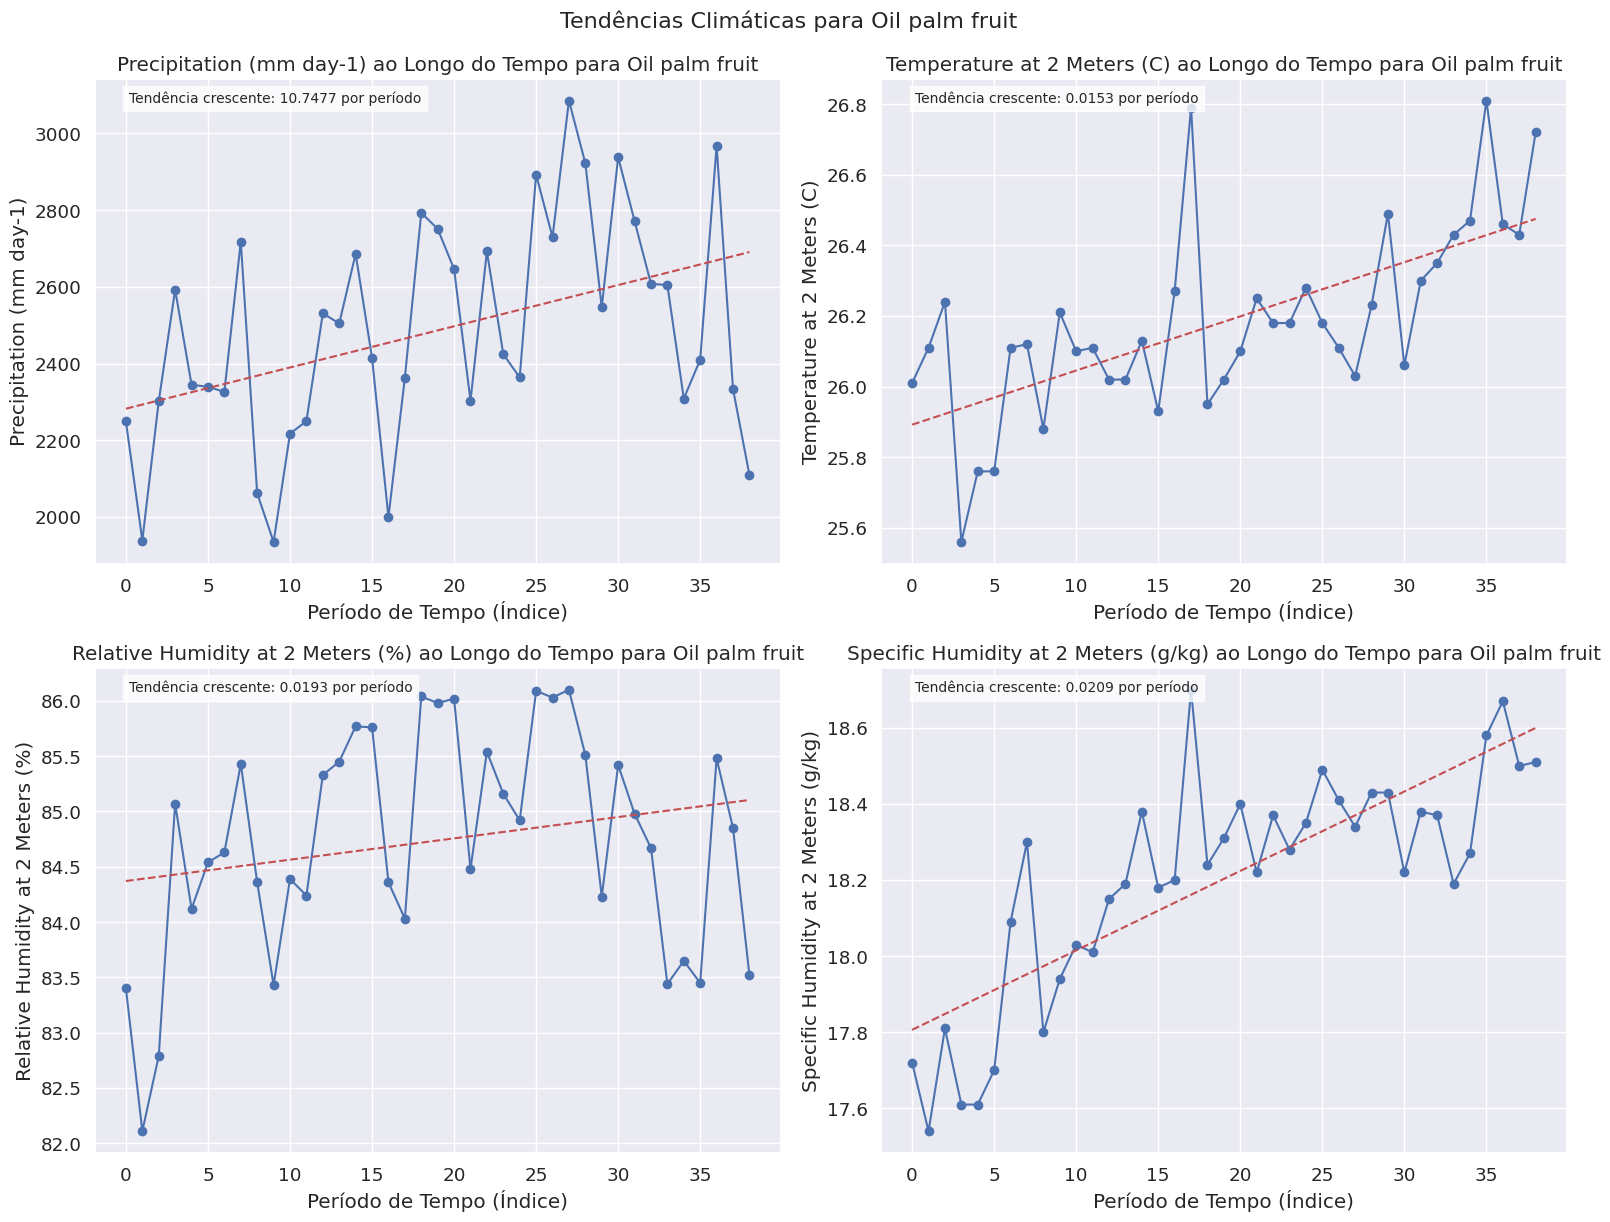

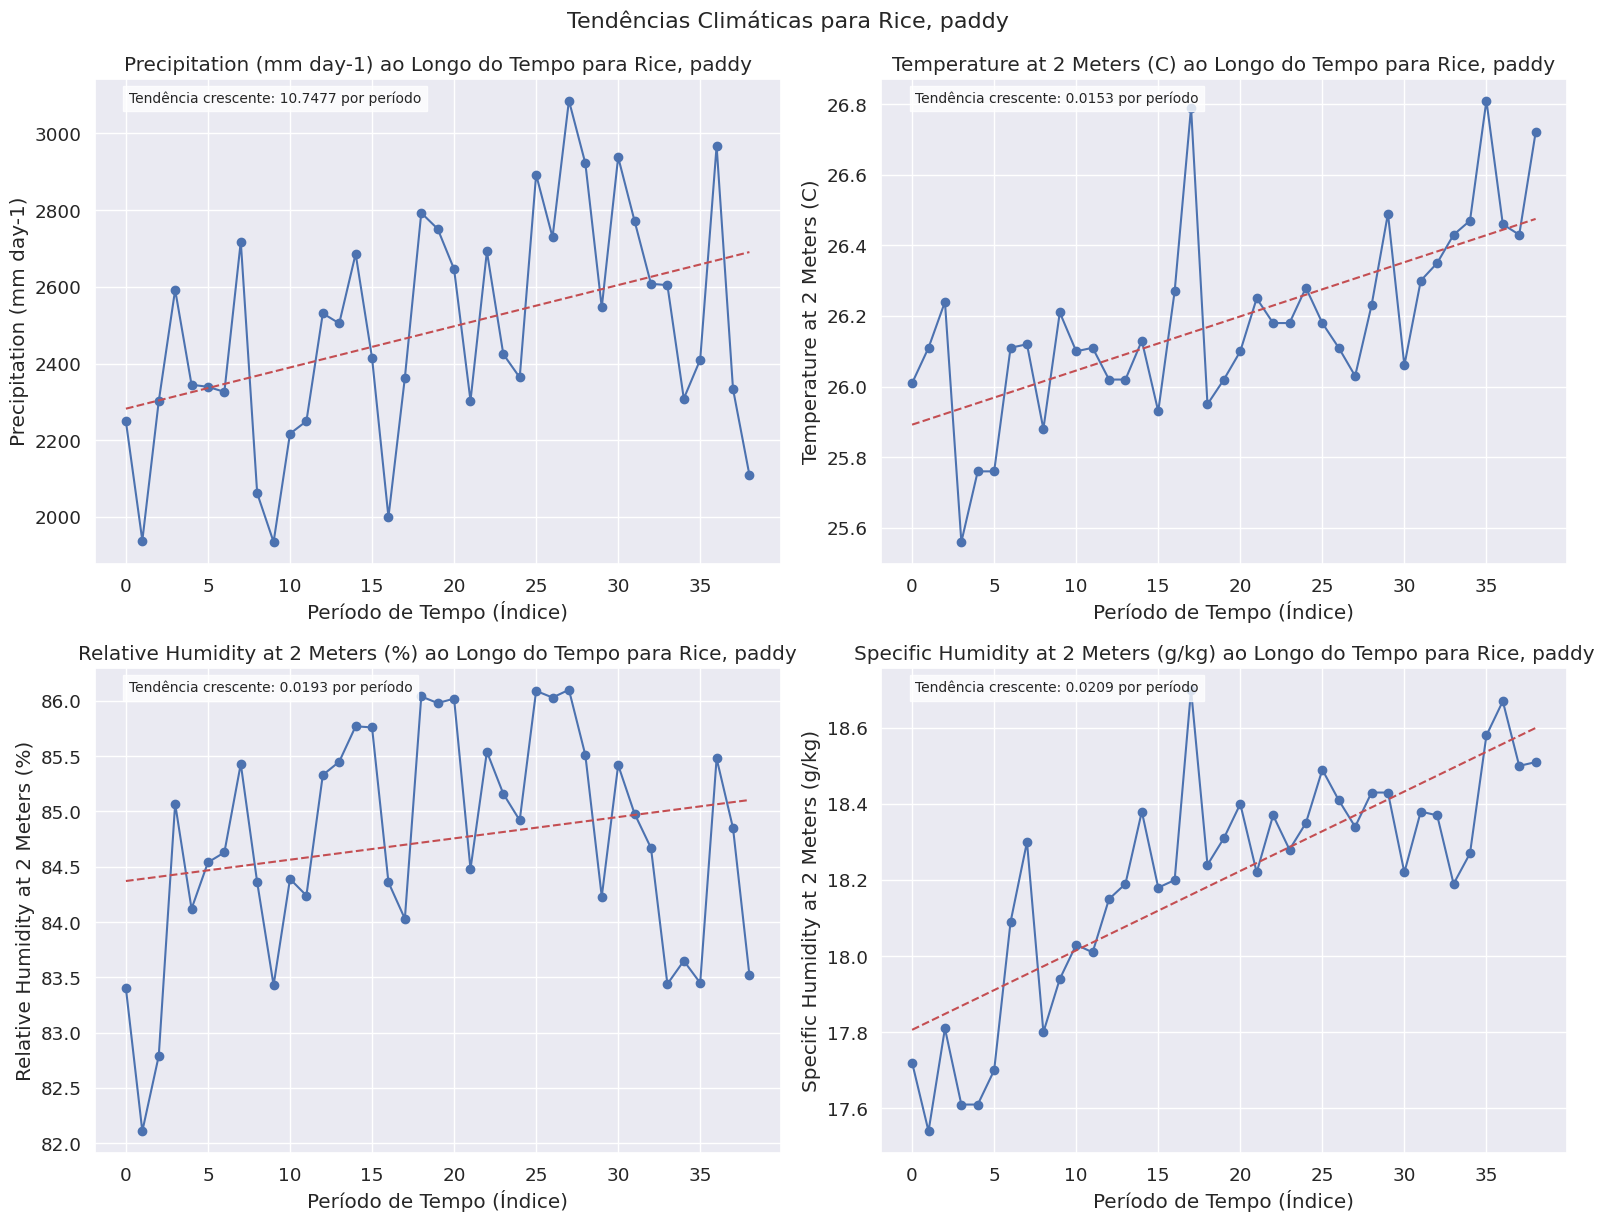

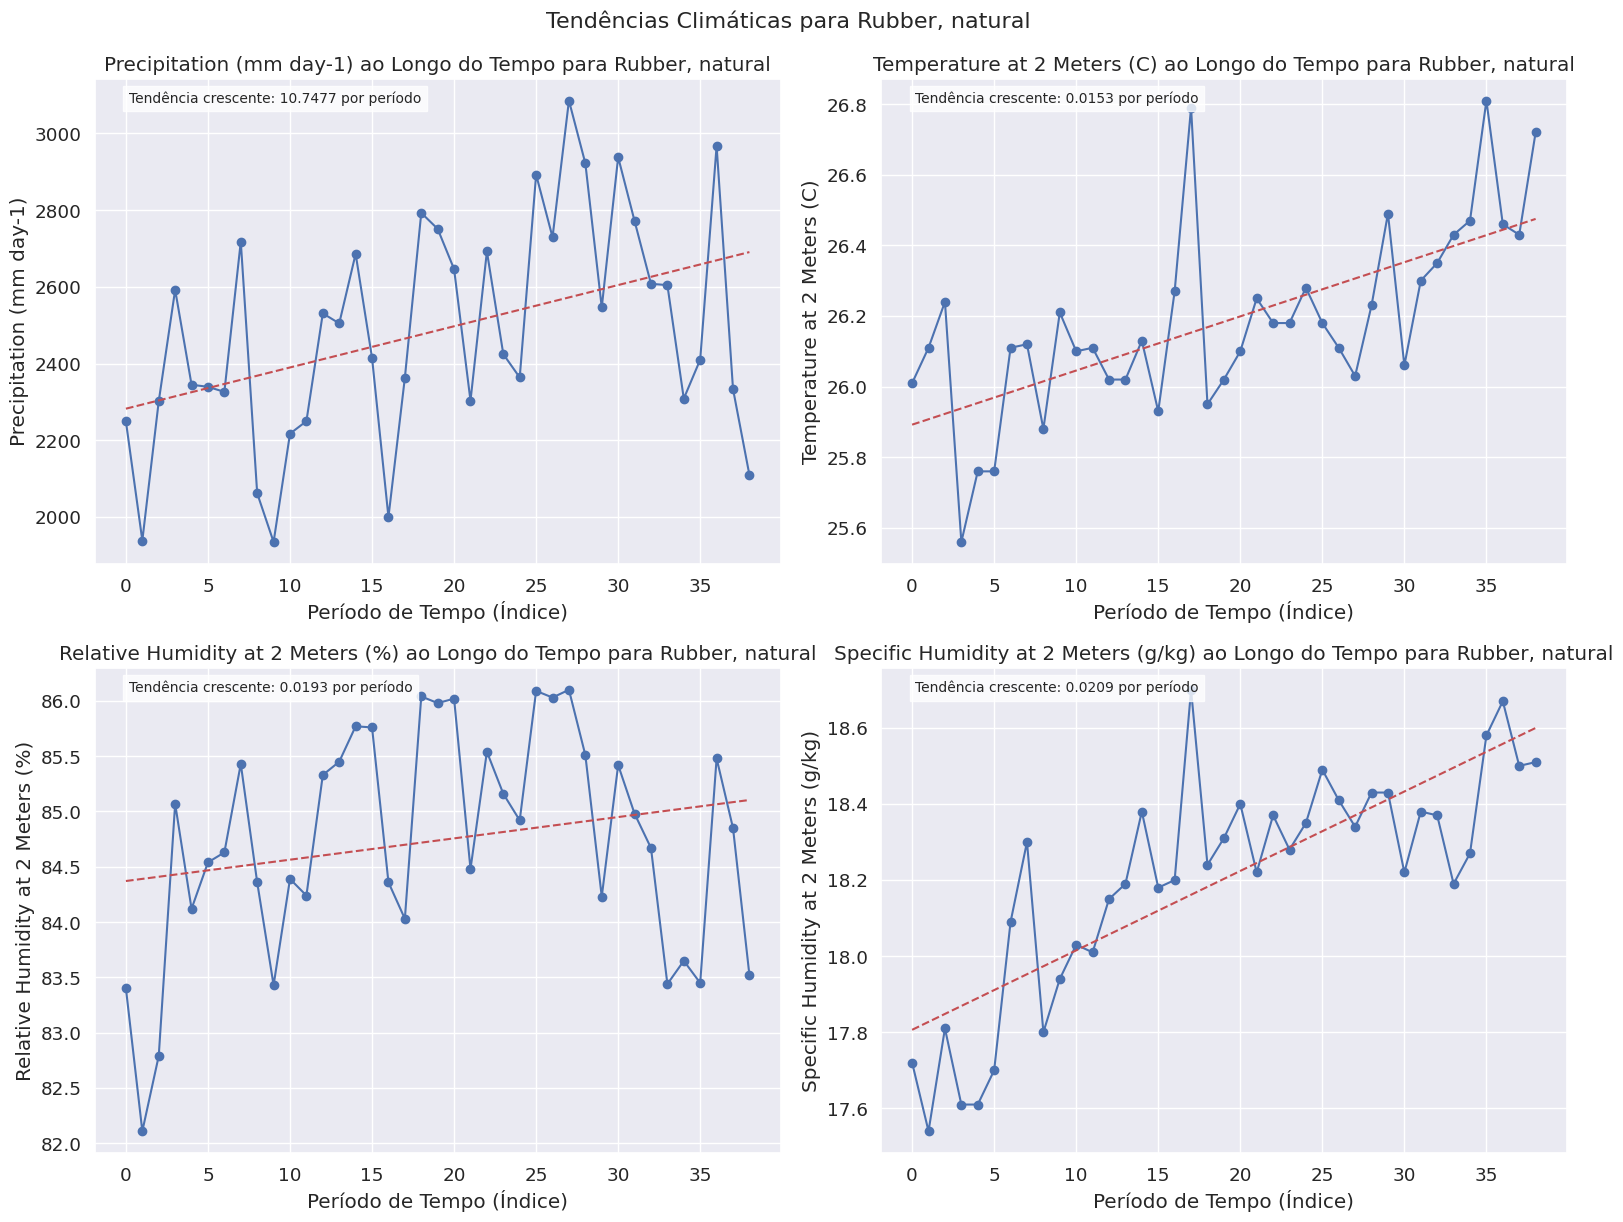

In [ ]:
# Análise de mudanças nas condições climáticas ao longo do tempo
climate_vars = ['Precipitation (mm day-1)', 'Temperature at 2 Meters (C)',
                'Relative Humidity at 2 Meters (%)', 'Specific Humidity at 2 Meters (g/kg)']

for crop in crops:
    crop_data = df[df['Crop'] == crop]

    plt.figure(figsize=(16, 12))

    for i, var in enumerate(climate_vars):
        plt.subplot(2, 2, i+1)

        # Gráfico da variável climática ao longo do tempo
        plt.plot(crop_data['time_index'], crop_data[var], marker='o', linestyle='-')

        # Linha de tendência
        z = np.polyfit(crop_data['time_index'], crop_data[var], 1)
        p = np.poly1d(z)
        plt.plot(crop_data['time_index'], p(crop_data['time_index']), "r--")

        # Mostrar inclinação da tendência
        slope = z[0]
        trend_direction = "crescente" if slope > 0 else "decrescente"
        plt.text(0.05, 0.95, f"Tendência {trend_direction}: {slope:.4f} por período",
                 transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

        plt.title(f'{var} ao Longo do Tempo para {crop}')
        plt.xlabel('Período de Tempo (Índice)')
        plt.ylabel(var)
        plt.grid(True)

    plt.tight_layout()
    plt.suptitle(f'Tendências Climáticas para {crop}', fontsize=16, y=1.02)
    plt.show()

## 4. Identificação de Cenários Ótimos

* Determinação dos cenários de maior rendimento (top 20%)
* Análise das condições climáticas ótimas para cada cultura
* Comparação entre condições médias e condições ótimas
* Visualização das distribuições de variáveis climáticas nos cenários de alto rendimento



==== IDENTIFICAÇÃO DE CENÁRIOS ÓTIMOS PARA RENDIMENTO MÁXIMO ====

Cenários Ótimos para Cocoa, beans (Top 20% de Rendimento):
Rendimento médio nos cenários ótimos: 11453.12
Comparado com média geral: 8883.13
Melhoria percentual: 28.93%

Condições Climáticas nos Cenários Ótimos:
  Precipitation (mm day-1):
    Média nos cenários ótimos: 2569.05
    Média geral: 2486.50
    Diferença: +3.32%
  Temperature at 2 Meters (C):
    Média nos cenários ótimos: 26.22
    Média geral: 26.18
    Diferença: +0.15%
  Relative Humidity at 2 Meters (%):
    Média nos cenários ótimos: 84.53
    Média geral: 84.74
    Diferença: -0.24%
  Specific Humidity at 2 Meters (g/kg):
    Média nos cenários ótimos: 18.20
    Média geral: 18.20
    Diferença: -0.04%


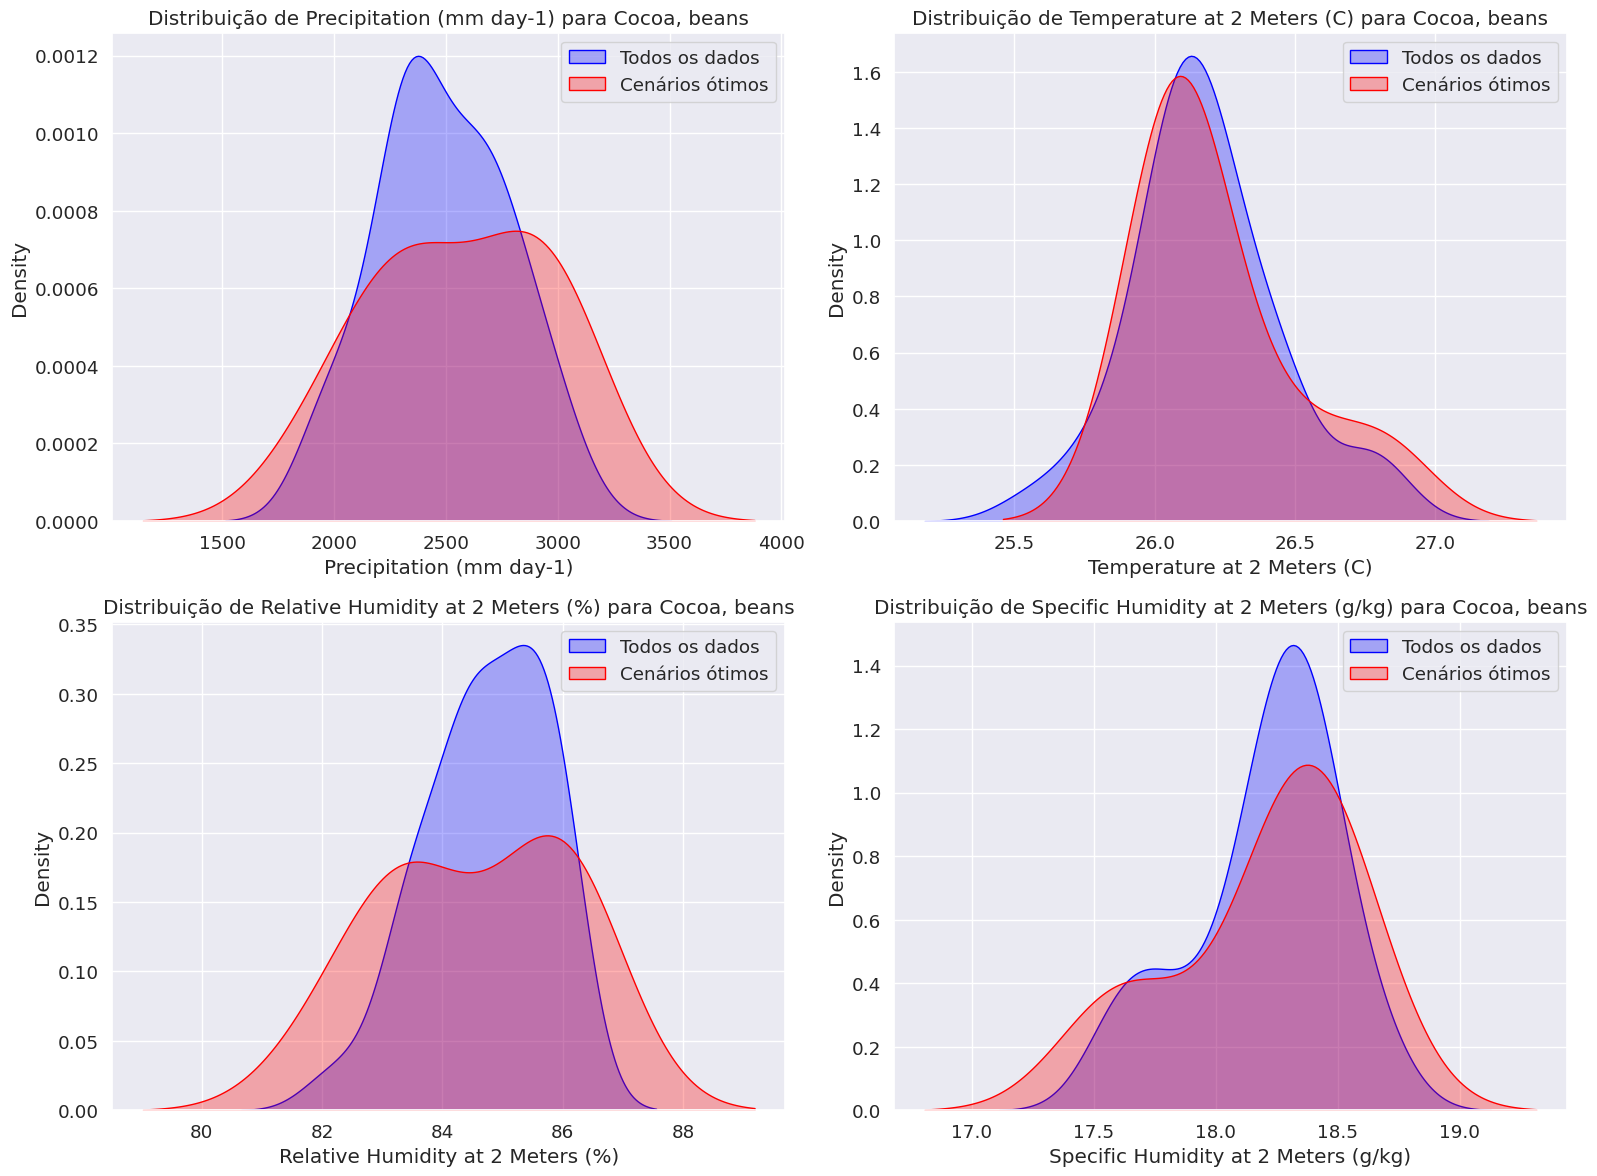


Cenários Ótimos para Oil palm fruit (Top 20% de Rendimento):
Rendimento médio nos cenários ótimos: 196498.75
Comparado com média geral: 175804.69
Melhoria percentual: 11.77%

Condições Climáticas nos Cenários Ótimos:
  Precipitation (mm day-1):
    Média nos cenários ótimos: 2530.04
    Média geral: 2486.50
    Diferença: +1.75%
  Temperature at 2 Meters (C):
    Média nos cenários ótimos: 26.35
    Média geral: 26.18
    Diferença: +0.65%
  Relative Humidity at 2 Meters (%):
    Média nos cenários ótimos: 84.41
    Média geral: 84.74
    Diferença: -0.39%
  Specific Humidity at 2 Meters (g/kg):
    Média nos cenários ótimos: 18.31
    Média geral: 18.20
    Diferença: +0.61%


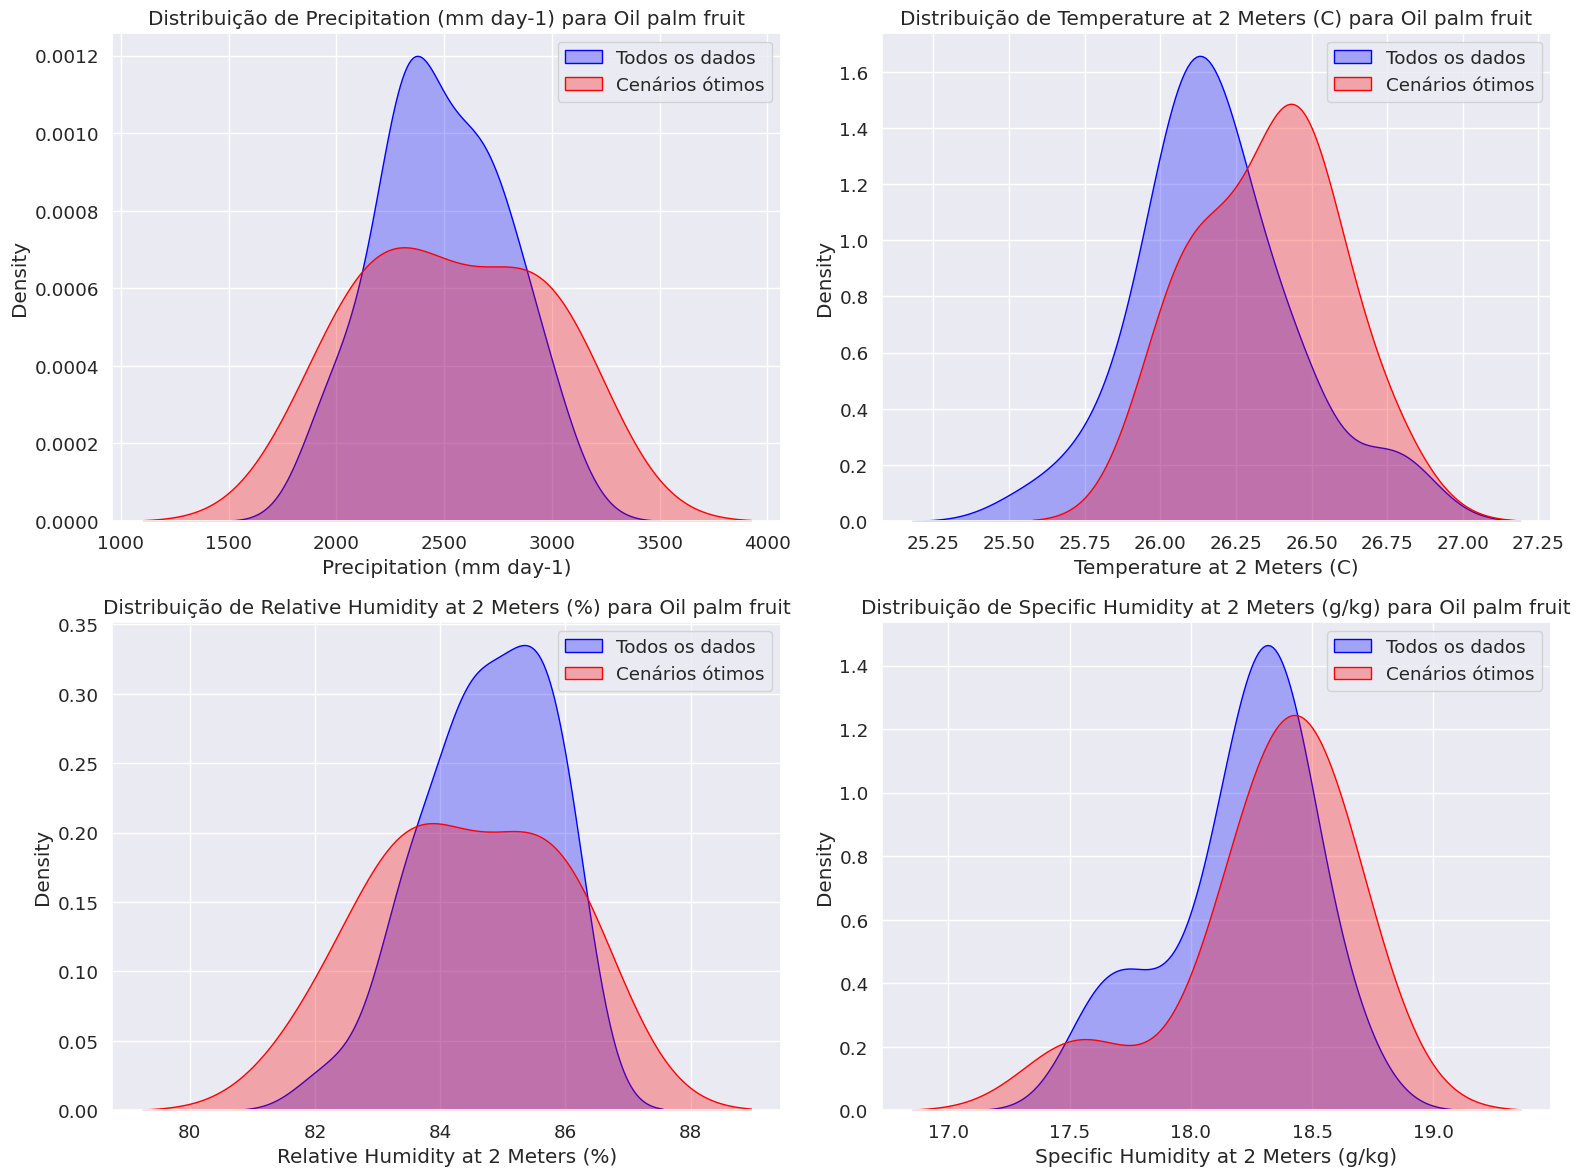


Cenários Ótimos para Rice, paddy (Top 20% de Rendimento):
Rendimento médio nos cenários ótimos: 38993.88
Comparado com média geral: 32099.67
Melhoria percentual: 21.48%

Condições Climáticas nos Cenários Ótimos:
  Precipitation (mm day-1):
    Média nos cenários ótimos: 2555.85
    Média geral: 2486.50
    Diferença: +2.79%
  Temperature at 2 Meters (C):
    Média nos cenários ótimos: 26.45
    Média geral: 26.18
    Diferença: +1.02%
  Relative Humidity at 2 Meters (%):
    Média nos cenários ótimos: 84.50
    Média geral: 84.74
    Diferença: -0.28%
  Specific Humidity at 2 Meters (g/kg):
    Média nos cenários ótimos: 18.44
    Média geral: 18.20
    Diferença: +1.29%


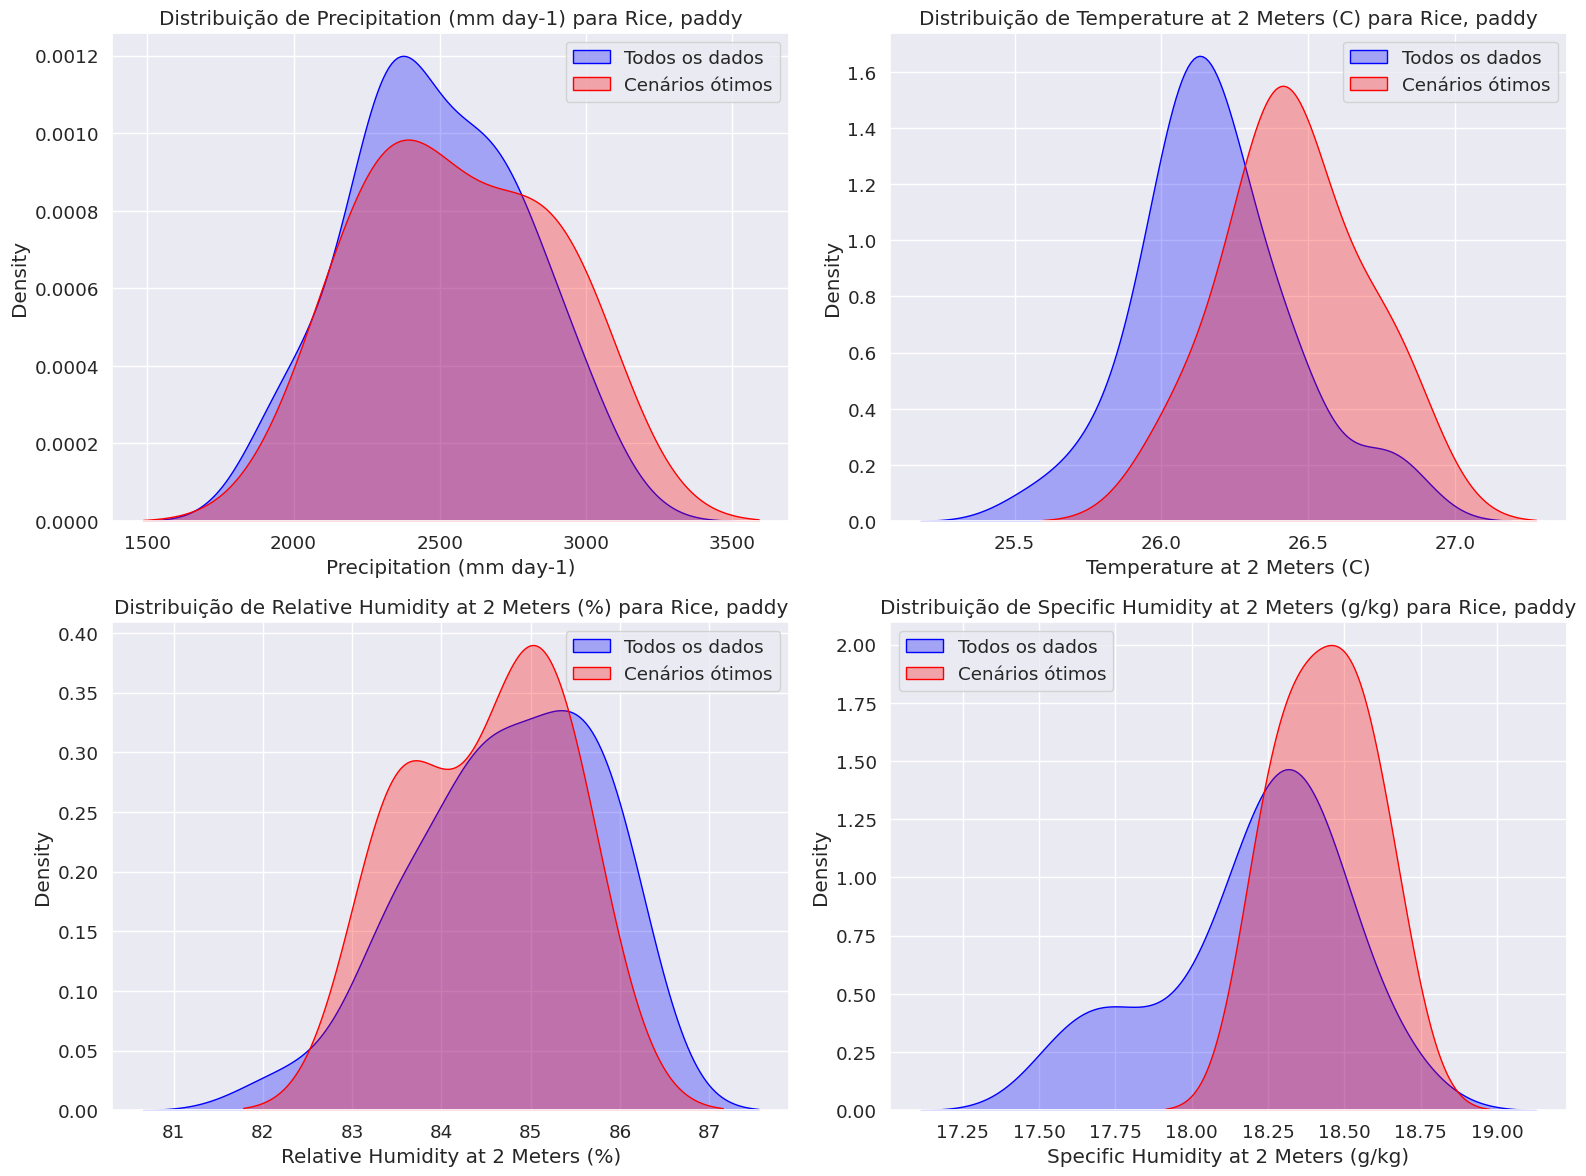


Cenários Ótimos para Rubber, natural (Top 20% de Rendimento):
Rendimento médio nos cenários ótimos: 9921.88
Comparado com média geral: 7824.90
Melhoria percentual: 26.80%

Condições Climáticas nos Cenários Ótimos:
  Precipitation (mm day-1):
    Média nos cenários ótimos: 2604.74
    Média geral: 2486.50
    Diferença: +4.76%
  Temperature at 2 Meters (C):
    Média nos cenários ótimos: 26.02
    Média geral: 26.18
    Diferença: -0.63%
  Relative Humidity at 2 Meters (%):
    Média nos cenários ótimos: 85.00
    Média geral: 84.74
    Diferença: +0.31%
  Specific Humidity at 2 Meters (g/kg):
    Média nos cenários ótimos: 18.08
    Média geral: 18.20
    Diferença: -0.68%


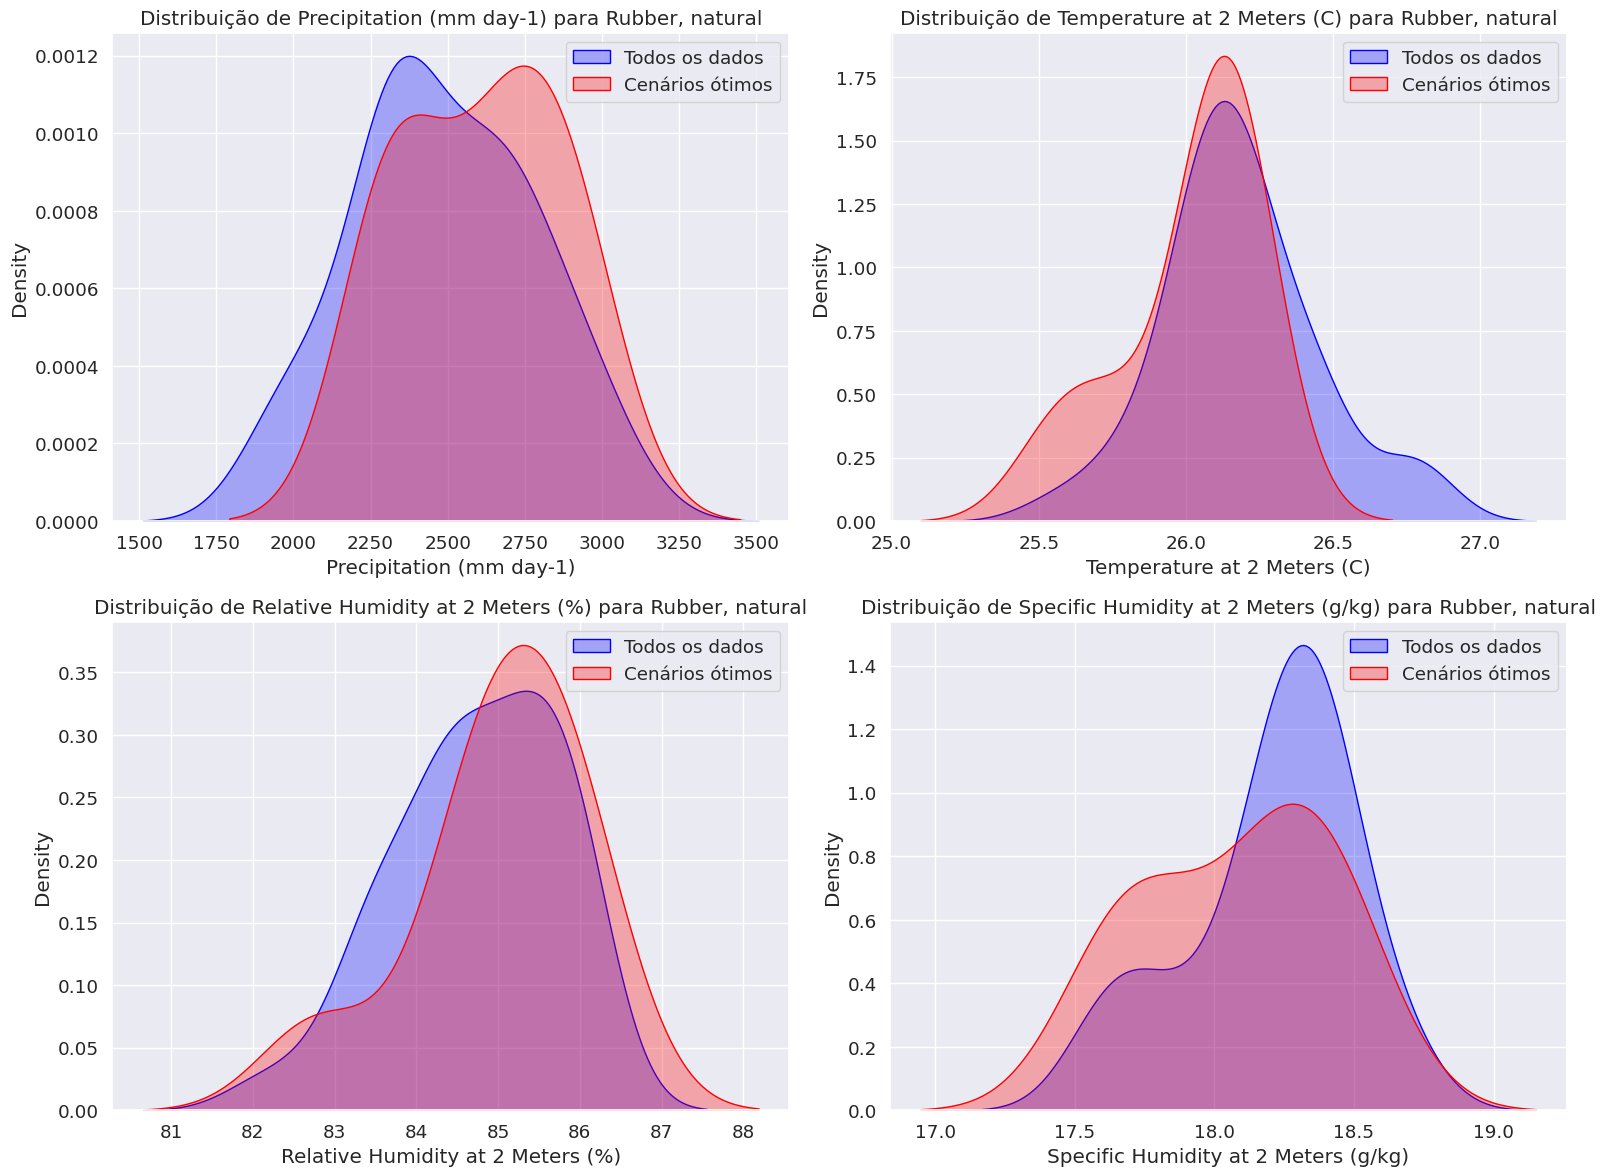

In [ ]:
# =====================================================
# 4. ANÁLISE DE CENÁRIOS ÓTIMOS PARA RENDIMENTO
# =====================================================
print("\n\n==== IDENTIFICAÇÃO DE CENÁRIOS ÓTIMOS PARA RENDIMENTO MÁXIMO ====")

for crop in crops:
    crop_data = df[df['Crop'] == crop]

    # Identificar os registros com maiores rendimentos (top 20%)
    threshold = crop_data['Yield'].quantile(0.8)
    top_yield = crop_data[crop_data['Yield'] >= threshold]

    print(f"\nCenários Ótimos para {crop} (Top 20% de Rendimento):")
    print(f"Rendimento médio nos cenários ótimos: {top_yield['Yield'].mean():.2f}")
    print(f"Comparado com média geral: {crop_data['Yield'].mean():.2f}")
    print(f"Melhoria percentual: {(top_yield['Yield'].mean() / crop_data['Yield'].mean() - 1) * 100:.2f}%")

    # Estatísticas das condições climáticas nos cenários ótimos
    print("\nCondições Climáticas nos Cenários Ótimos:")
    for var in climate_vars:
        optimal_mean = top_yield[var].mean()
        overall_mean = crop_data[var].mean()
        diff_pct = (optimal_mean / overall_mean - 1) * 100

        print(f"  {var}:")
        print(f"    Média nos cenários ótimos: {optimal_mean:.2f}")
        print(f"    Média geral: {overall_mean:.2f}")
        print(f"    Diferença: {diff_pct:+.2f}%")

    # Visualização das distribuições nos cenários ótimos vs. todo o dataset
    plt.figure(figsize=(16, 12))

    for i, var in enumerate(climate_vars):
        plt.subplot(2, 2, i+1)

        # KDE para todo o dataset
        sns.kdeplot(crop_data[var], fill=True, color='blue', alpha=0.3, label='Todos os dados')

        # KDE para cenários ótimos
        sns.kdeplot(top_yield[var], fill=True, color='red', alpha=0.3, label='Cenários ótimos')

        plt.title(f'Distribuição de {var} para {crop}')
        plt.xlabel(var)
        plt.legend()

    plt.tight_layout()
    plt.show()


## 5. Resumo Integrado dos Padrões

* Síntese das tendências identificadas para cada cultura
* Identificação das variáveis com maior impacto no rendimento
* Determinação das faixas ideais para cada variável climática

In [ ]:
# =====================================================
# 5. RESUMO DAS TENDÊNCIAS E CLUSTERS IDENTIFICADOS
# =====================================================
print("\n\n==== RESUMO DAS TENDÊNCIAS E PADRÕES IDENTIFICADOS ====")

for crop in crops:
    crop_data = df[df['Crop'] == crop]

    # Tendência de rendimento (regressão linear)
    time_indices = crop_data['time_index']
    yields = crop_data['Yield']
    z = np.polyfit(time_indices, yields, 1)
    slope = z[0]

    # Correlações entre variáveis climáticas e rendimento
    correlations = {}
    for var in climate_vars:
        corr = crop_data[var].corr(crop_data['Yield'])
        correlations[var] = corr

    # Identificar a variável com maior impacto no rendimento
    max_corr_var = max(correlations.items(), key=lambda x: abs(x[1]))

    print(f"\n===== {crop} =====")
    print(f"Tendência geral de rendimento: {'Crescente' if slope > 0 else 'Decrescente'} ({slope:.2f} por período)")

    # Estatísticas dos outliers
    z_scores = stats.zscore(crop_data['Yield'])
    outliers_z = crop_data[abs(z_scores) > 2.5]
    print(f"Outliers identificados: {len(outliers_z)} ({len(outliers_z)/len(crop_data)*100:.1f}%)")

    # Resumo das correlações
    print("\nImpacto das variáveis climáticas no rendimento:")
    for var, corr in sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True):
        strength = abs(corr)
        impact = "forte" if strength > 0.5 else "moderado" if strength > 0.3 else "fraco"
        direction = "positivo" if corr > 0 else "negativo"

        print(f"  {var}: Impacto {impact} e {direction} (r = {corr:.3f})")

    print(f"\nVariável com maior impacto no rendimento: {max_corr_var[0]} (r = {max_corr_var[1]:.3f})")

    # Condições ótimas para rendimento máximo
    threshold = crop_data['Yield'].quantile(0.8)
    top_yield = crop_data[crop_data['Yield'] >= threshold]

    print("\nCondições ideais para rendimento máximo:")
    for var in climate_vars:
        optimal_range_min = top_yield[var].quantile(0.25)
        optimal_range_max = top_yield[var].quantile(0.75)
        print(f"  {var}: {optimal_range_min:.2f} a {optimal_range_max:.2f}")



==== RESUMO DAS TENDÊNCIAS E PADRÕES IDENTIFICADOS ====

===== Cocoa, beans =====
Tendência geral de rendimento: Crescente (15.43 por período)
Outliers identificados: 0 (0.0%)

Impacto das variáveis climáticas no rendimento:
  Precipitation (mm day-1): Impacto fraco e positivo (r = 0.174)
  Relative Humidity at 2 Meters (%): Impacto fraco e negativo (r = -0.058)
  Specific Humidity at 2 Meters (g/kg): Impacto fraco e negativo (r = -0.055)
  Temperature at 2 Meters (C): Impacto fraco e negativo (r = -0.010)

Variável com maior impacto no rendimento: Precipitation (mm day-1) (r = 0.174)

Condições ideais para rendimento máximo:
  Precipitation (mm day-1): 2293.61 a 2904.16
  Temperature at 2 Meters (C): 26.05 a 26.25
  Relative Humidity at 2 Meters (%): 83.44 a 86.05
  Specific Humidity at 2 Meters (g/kg): 18.09 a 18.43

===== Oil palm fruit =====
Tendência geral de rendimento: Crescente (651.40 por período)
Outliers identificados: 0 (0.0%)

Impacto das variáveis climáticas no rendimen

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Carregar os dados
data = pd.read_csv('/crop_yield.csv')

# Codificar variáveis categóricas
data = pd.get_dummies(data, columns=['Crop'], drop_first=True)

# Dividir os dados em features (X) e target (y)
X = data.drop('Yield', axis=1)
y = data['Yield']

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Predição de Rendimento de Culturas com Regressão

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 1. Carregar os dados
data = pd.read_csv('/crop_yield.csv')

# 2. Codificar variáveis categóricas (one-hot encoding para 'Crop')
data = pd.get_dummies(data, columns=['Crop'], drop_first=True)

# 3. Dividir os dados em features (X) e target (y)
X = data.drop('Yield', axis=1)
y = data['Yield']

# 4. Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Treinar e avaliar os modelos

# Função para treinar e avaliar um modelo
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name, scale_data=False):
    if scale_data:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MSE: {mse}, R2: {r2}")
    return model, scaler if scale_data else model

# 5.1. Linear Regression
lr = LinearRegression()
lr, _ = train_and_evaluate_model(lr, X_train, y_train, X_test, y_test, "Linear Regression")

# 5.2. Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt, _ = train_and_evaluate_model(dt, X_train, y_train, X_test, y_test, "Decision Tree")

# 5.3. Random Forest
rf = RandomForestRegressor(random_state=42)
rf, _ = train_and_evaluate_model(rf, X_train, y_train, X_test, y_test, "Random Forest")

# 5.4. SVR (Support Vector Regression)
svr = SVR(kernel='rbf')
svr, svr_scaler = train_and_evaluate_model(svr, X_train, y_train, X_test, y_test, "SVR", scale_data=True)

# 5.5. XGBoost
xgb = XGBRegressor(random_state=42)
xgb, _ = train_and_evaluate_model(xgb, X_train, y_train, X_test, y_test, "XGBoost")

# 6. Fazer previsões com novos dados
# Exemplo de novos dados para previsão
novos_dados = {
    'Precipitation (mm day-1)': [2300.0],
    'Specific Humidity at 2 Meters (g/kg)': [17.8],
    'Relative Humidity at 2 Meters (%)': [84.0],
    'Temperature at 2 Meters (C)': [26.0],
    'Crop_Cocoa, beans': [1],  # Suponha que estamos prevendo para "Cocoa, beans"
    'Crop_Oil palm fruit': [0],
    'Crop_Rice, paddy': [0],
    'Crop_Rubber, natural': [0]
}

# Converter para DataFrame
novos_dados_df = pd.DataFrame(novos_dados)

# Garantir que as colunas dos novos dados correspondam às colunas usadas no treinamento
# Isso é necessário porque o one-hot encoding pode criar colunas diferentes dependendo dos dados
novos_dados_df = novos_dados_df.reindex(columns=X_train.columns, fill_value=0)

# Fazer previsões com cada modelo
print("\nPrevisões com novos dados:")
print(f"Linear Regression: {lr.predict(novos_dados_df)[0]:.2f}")
print(f"Decision Tree: {dt.predict(novos_dados_df)[0]:.2f}")
print(f"Random Forest: {rf.predict(novos_dados_df)[0]:.2f}")

# Para o SVR, é necessário escalonar os novos dados
novos_dados_scaled = svr_scaler.transform(novos_dados_df)
print(f"SVR: {svr.predict(novos_dados_scaled)[0]:.2f}")

print(f"XGBoost: {xgb.predict(novos_dados_df)[0]:.2f}")

Linear Regression - MSE: 19308693.24484311, R2: 0.9950222133854734
Decision Tree - MSE: 28263542.71875, R2: 0.9927136506422012
Random Forest - MSE: 23833556.706271887, R2: 0.9938557022971646
SVR - MSE: 5084567502.12607, R2: -0.31080294931404673
XGBoost - MSE: 45272308.0, R2: 0.9883288145065308

Previsões com novos dados:
Linear Regression: 6211.66
Decision Tree: 9003.00
Random Forest: 9262.95
SVR: 12706.43
XGBoost: 9358.93
